Выпускная квалификационная работа Курбатов А.В.
Тема исследования: Прогнозирование конечных свойств новых материалов (композиционных материалов).

Задача - создать модель, предсказывающую следующие свойства композитов на основе других характеристик материалов, представленных в датасете:
-	Модуль упругости при растяжении, ГПа
-	Прочность при растяжении, МПа

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Загружаем исходные данные - датасет со свойствами композитов.

Датасет представлен 2мя таблицами в формате Excel , требующих объединения INNER.
X_bp.xlsx - характеристики базальтопластика
X_nup.xlsx характеристики углепластика

In [2]:
#Указываем путь к файламс данными
data_path = '../Data/'

In [7]:
#УБРАТЬ
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Загружаем данные из первого файла, смотрим размерность и названия столбцов
df_bp = pd.read_excel(data_path + 'X_bp.xlsx', index_col=0)
df_bp.shape

(1023, 10)

In [4]:
df_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

Итак, в первом файле видим 1023 объекта, 10 признаков для каждого, при этом 2 признака - целевые.

In [5]:
#Загружаем данные из второго файла, смотрим размерность и названия столбцов
df_nup = pd.read_excel(data_path + 'X_nup.xlsx', index_col=0)
df_nup.shape

(1040, 3)

In [6]:
df_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

Во втором файле видим 1040 объектов, 3 признака для каждого.

In [7]:
#Объединяем датасеты в один, по inner, как указано в условиях задачи
df = df_bp.merge(df_nup, left_index = True, right_index = True, how = 'inner')
#Выведем размерность итогового датасета, и так же посмотрим первые 5 строк
df.shape

(1023, 13)

In [8]:
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

После объединения в итоговом датасете имеем 1023 объекта с 13ю признаками, 2 из которых являются целевыми.

Исследование данных

In [9]:
#Смотрим информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

Видим, что все характеристики являются числовыми (12 признаков с вещественными числами и один с целыми), пропусков в данных нет.

In [10]:
#Смотрим количество уникальных значений в каждом столбце
df.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

Видим, что в основном объекты имеют различные значения признаков, за исключением Угла нашивки. Однако, учитывая физический смысл величины, попробуем оставить этот признак в неизмененном виде.

In [11]:
#Смотрим описательную статистику:
#count - количество значений
#mean - среднее значение
#std - стандартное отклонение
#min - минимум
#25% - верхнее значение первого квартиля
#50% - медиана
#75% - верхнее значение третьего квартиля
#max - максимум
df.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

Значения признаков имеют различный масштаб, поэтому скорее всего потребуется нормализация данных, т.к. имеем дело с задачей регрессии.
Все признаки принимают только неотрицательные значения.

In [12]:
#Проверяем данные на наличие дубликатов
df.duplicated().sum()

0

Дупликатов в датасете нет.

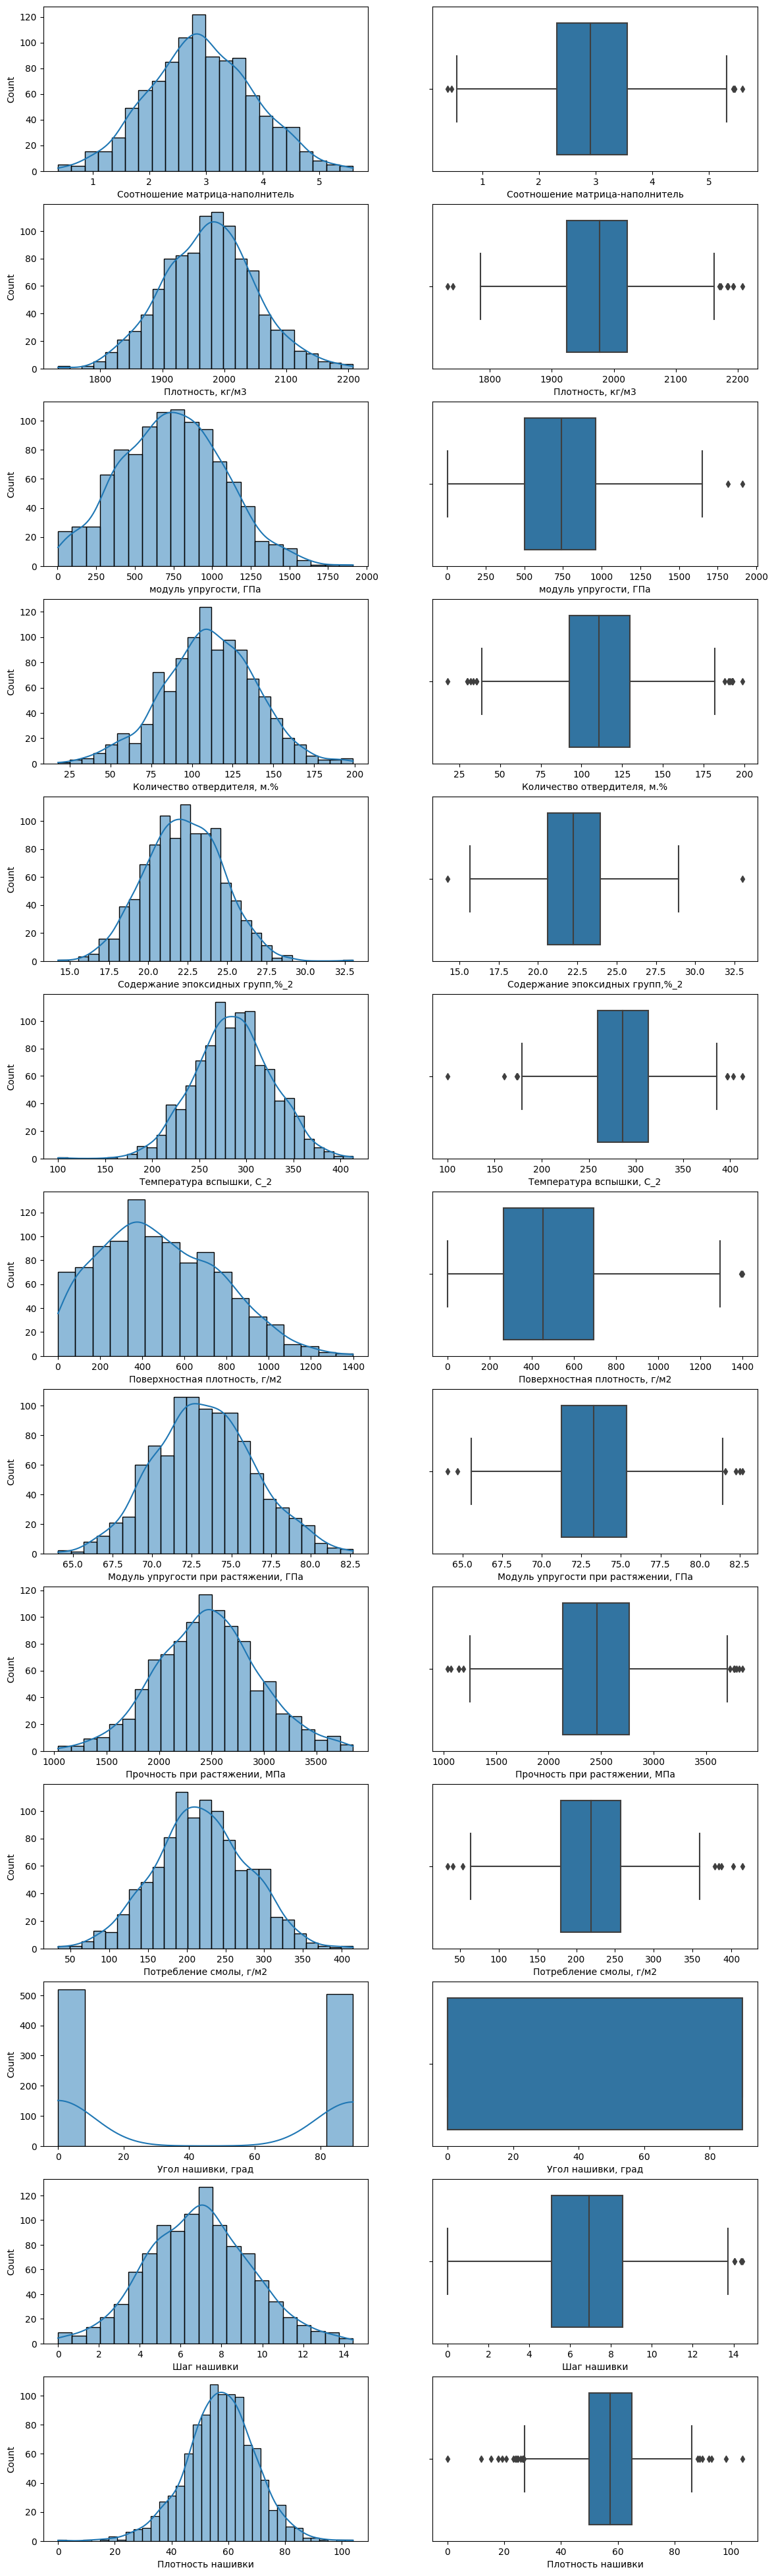

In [90]:
#Построим графики распределения и "ящики с усами" для каждого признака
#Сразу оформим построение в процедуру
def show_histplot_boxplot(data_p):
    fig, axes = plt.subplots(13, 2, figsize=(14, 50))
    for k, column in enumerate(data_p.columns):    
        sns.histplot(data=data_p, x=column, kde=True, ax=axes[k, 0])
        sns.boxplot(data=data_p, x=column, ax=axes[k, 1])
    plt.show()
show_histplot_boxplot(df)

Почти все признаки имеют распределение, близкое к нормальному. Исключение составляет признак "Угол нашивки", имеющий всего 2 значения.
Кроме того видим, что все признаки, кроме "Угла нашивки" имеют выбросы.

Далее посмотрим корреляцию между признаками, что даст нам понимание о зависимости признаков друг от друга, а так же о зависимости целевых признаков от остальных.

<function matplotlib.pyplot.show(close=None, block=None)>

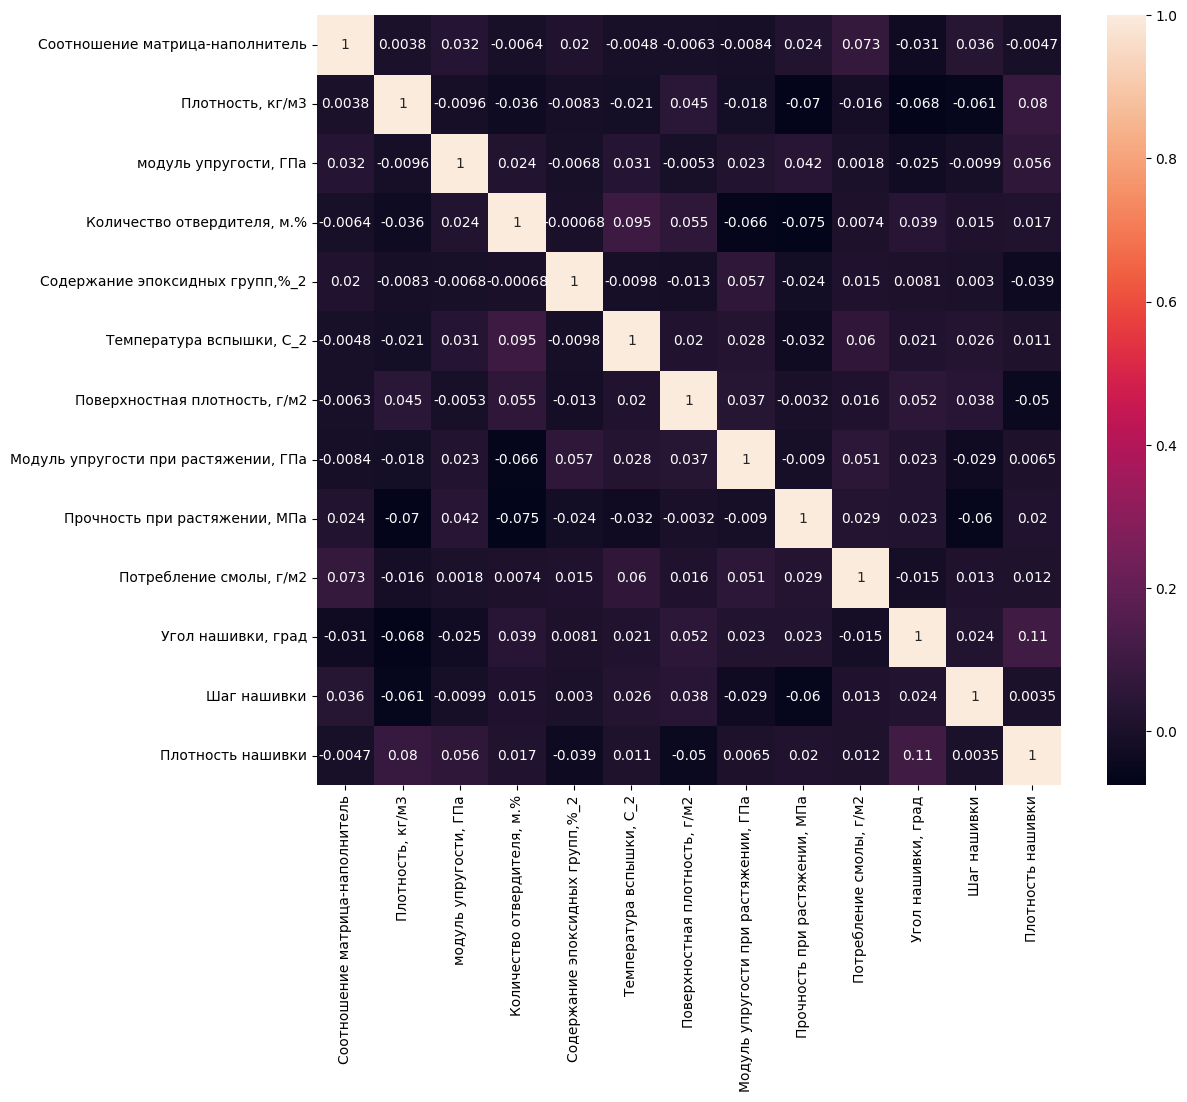

In [38]:
#Построим тепловую карту матрицы корреляции
f, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(df.corr(), annot=True)
plt.show

Видим, что корреляция достаточно близка к нулю, т.е. линейная зависимость между всеми парами признаков практически отсутствует.
Пока можно предположить, что модели линейной регрессии не дадут хорошего результата.

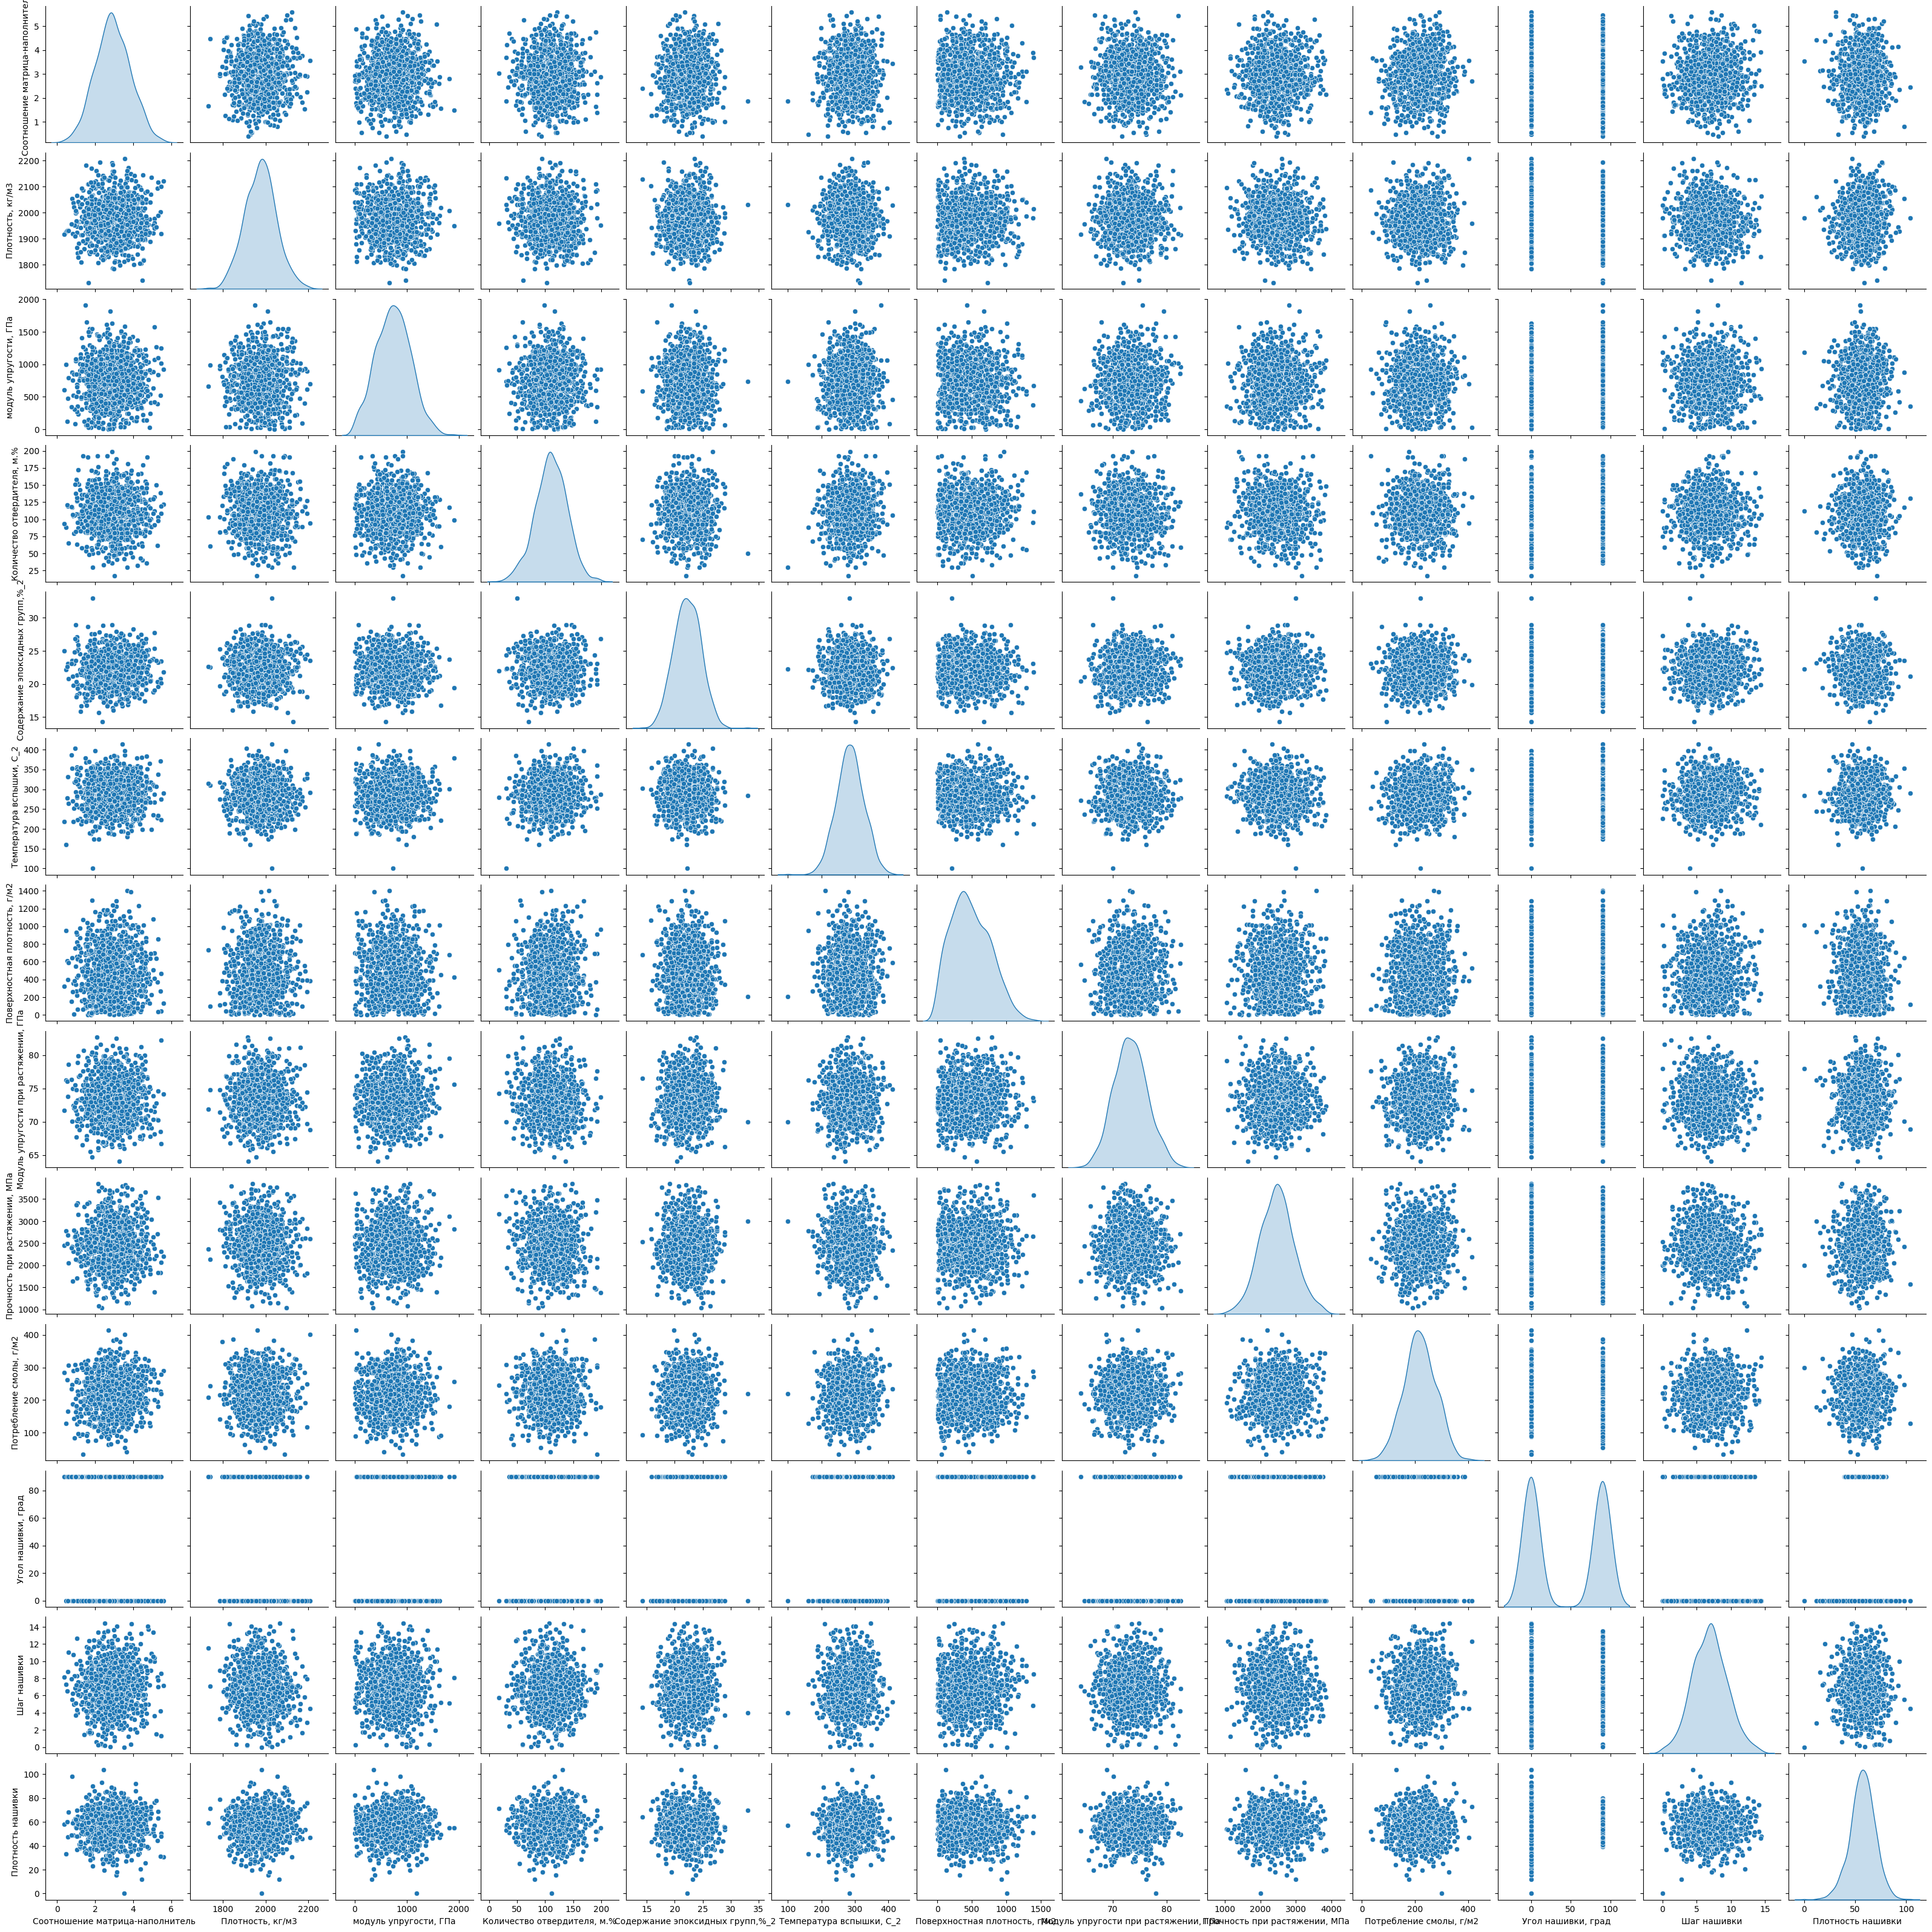

In [89]:
#Построим попарные графики рассеивания точек
sns.pairplot(df, diag_kind="kde")

Графики подтверждают нам:
1) отсутствие линейных зависимостей между признаками (ни один из графиков не "похож" на скопление вокруг прямой);
2) наличие выбросов (об этом говорят достаточно удаленные точки от общего облака точек))

Предобработка данных

Т.к. имеем дело с задачей регрессии, и признаки имеют значения в разных диапазонах, произведем нормализацию (масштабирование) данных с помощью метода MinMaxScaler.

In [13]:
#Нормализуем данные с помощью MinMaxScaler
min_max_scaler = MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index=df.index)

In [14]:
#Посмотрим результат
df_norm.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1023.0  0.488427  0.175541  0.0   
Плотность, кг/м3                      1023.0  0.512533  0.154890  0.0   
модуль упругости, ГПа                 1023.0  0.386301  0.172978  0.0   
Количество отвердителя, м.%           1023.0  0.512273  0.156147  0.0   
Содержание эпоксидных групп,%_2       1023.0  0.426215  0.128370  0.0   
Температура вспышки, С_2              1023.0  0.593354  0.130695  0.0   
Поверхностная плотность, г/м2         1023.0  0.344638  0.201092  0.0   
Модуль упругости при растяжении, ГПа  1023.0  0.497880  0.167435  0.0   
Прочность при растяжении, МПа         1023.0  0.508634  0.172724  0.0   
Потребление смолы, г/м2               1023.0  0.484838  0.156875  0.0   
Угол нашивки, град                    1023.0  0.491691  0.500175  0.0   
Шаг нашивки                           1023.0  0.477768  0.177519  0.0   
Плотность нашивки                     1023.0  0.549616  0.118772  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.370696  0.483912  0.608045  1.0  
Плотность, кг/м3                      0.404175  0.516497  0.608413  1.0  
модуль упругости, ГПа                 0.260652  0.386165  0.502528  1.0  
Количество отвердителя, м.%           0.412240  0.512240  0.618003  1.0  
Содержание эпоксидных групп,%_2       0.338919  0.425487  0.517842  1.0  
Температура вспышки, С_2              0.507756  0.593401  0.679924  1.0  
Поверхностная плотность, г/м2         0.190296  0.322574  0.495105  1.0  
Модуль упругости при растяжении, ГПа  0.386030  0.494672  0.606751  1.0  
Прочность при растяжении, МПа         0.390881  0.506003  0.615432  1.0  
Потребление смолы, г/м2               0.382955  0.486875  0.587411  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.351790  0.478940  0.594597  1.0  
Плотность нашивки                     0.478890  0.551423  0.624537  1.0

Видим, что теперь значения каждого признака лежат в диапазоне от 0 до 1.
Проверим изменились ли распределения.

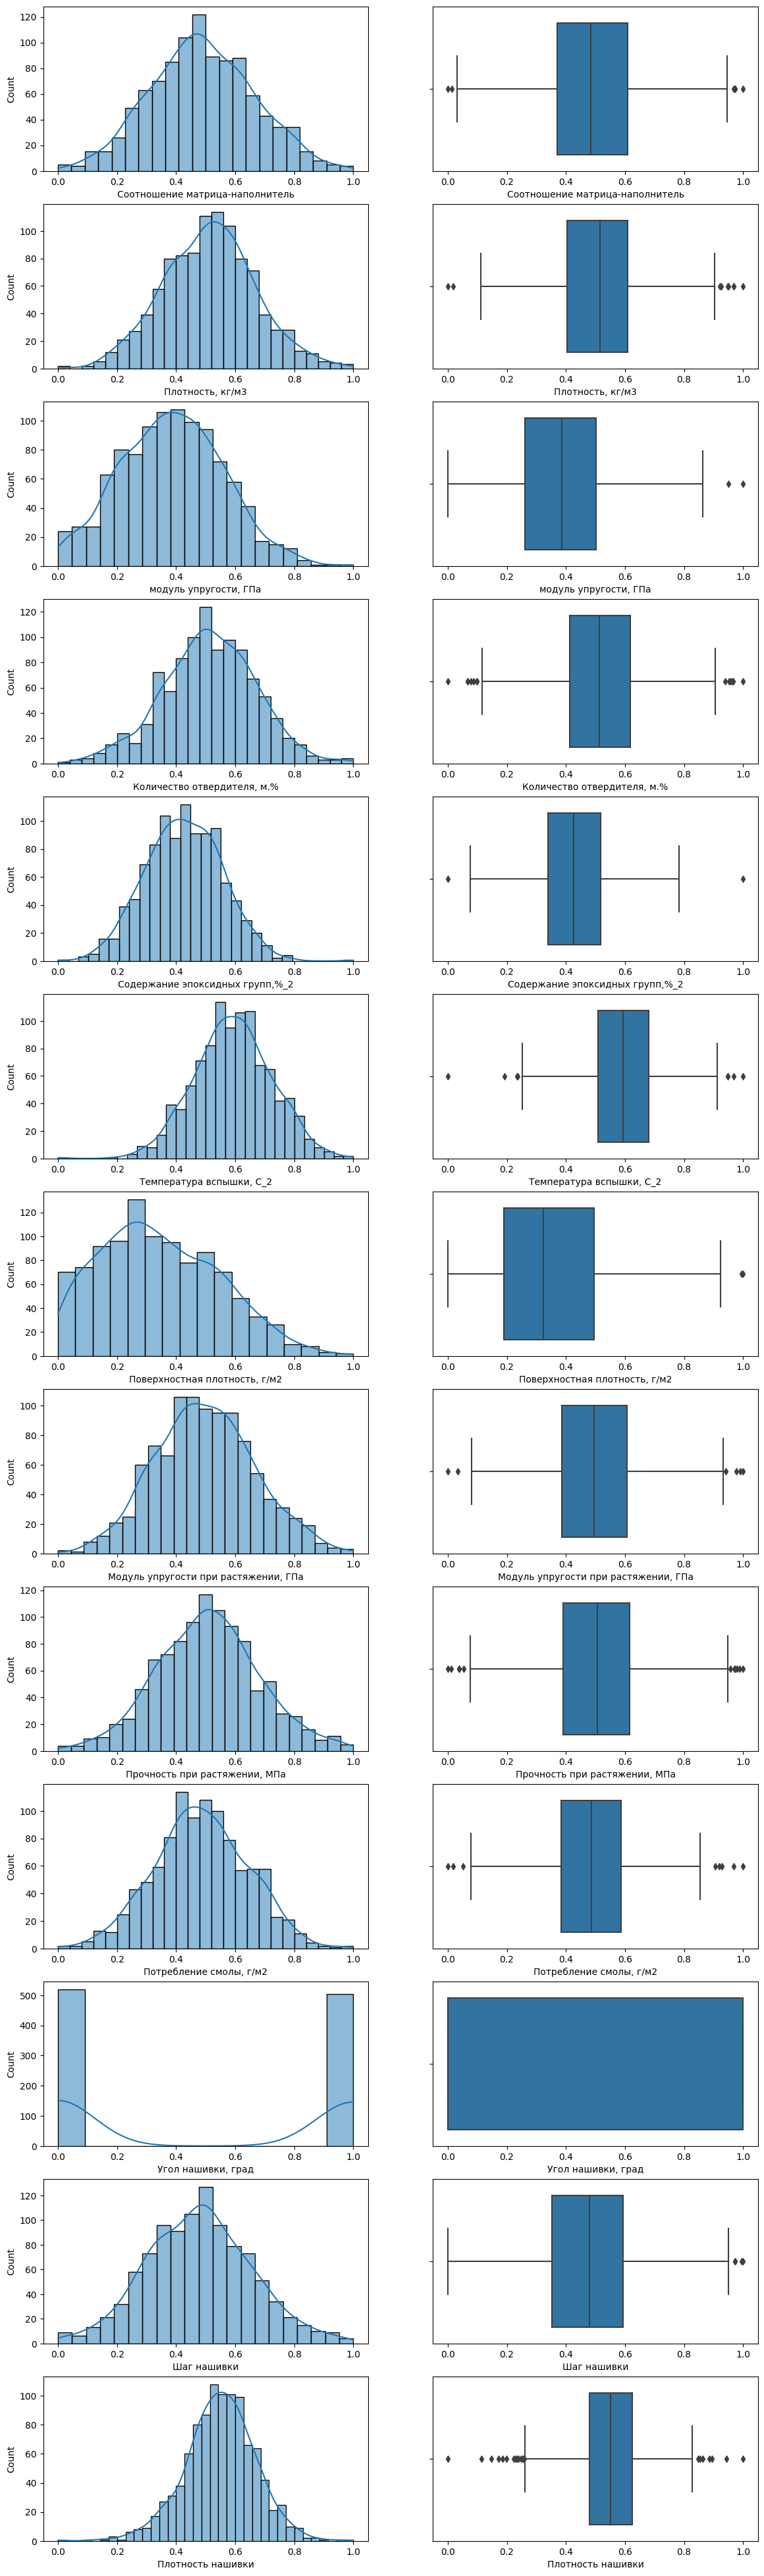

In [94]:
#Построим еще раз графики распределения и сразу посмотрим "ящики с усами" для каждого признака после нормализации
show_histplot_boxplot(df_norm)

Как и ожидалось ничего не изменилось - распределения остались прежними, выбросы те же.

Теперь удалим выбросы.
Существует 2 основных метода больбы с выбросами: метод 3х сигм и метод межквартильных расстояний.
Т.к. для некоторых признаков наблюдаем ассиметричное распределение, используем более подходящий в таких случаях метод межквартильных расстояний.

In [15]:
#Заменяем выбросы на пустое значение
for col in df_norm.columns:
    q75,q25 = np.percentile(df_norm.loc[:,col],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_norm.loc[df_norm[col] < min,col] = np.nan
    df_norm.loc[df_norm[col] > max,col] = np.nan

In [16]:
#Смотрим сколько подучилось выбросов для каждого столбца
df_norm.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Видим, что выбросов не много, около 10% выборки. Удалим их.

In [17]:
df_norm = df_norm.dropna(axis=0)
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    float64
 11  Шаг нашивки       

Посмотрели, что пустые значения удалены, в выборке осталось 936 объектов.
Посмотрим теперь "ящики с усами" для каждого признака.

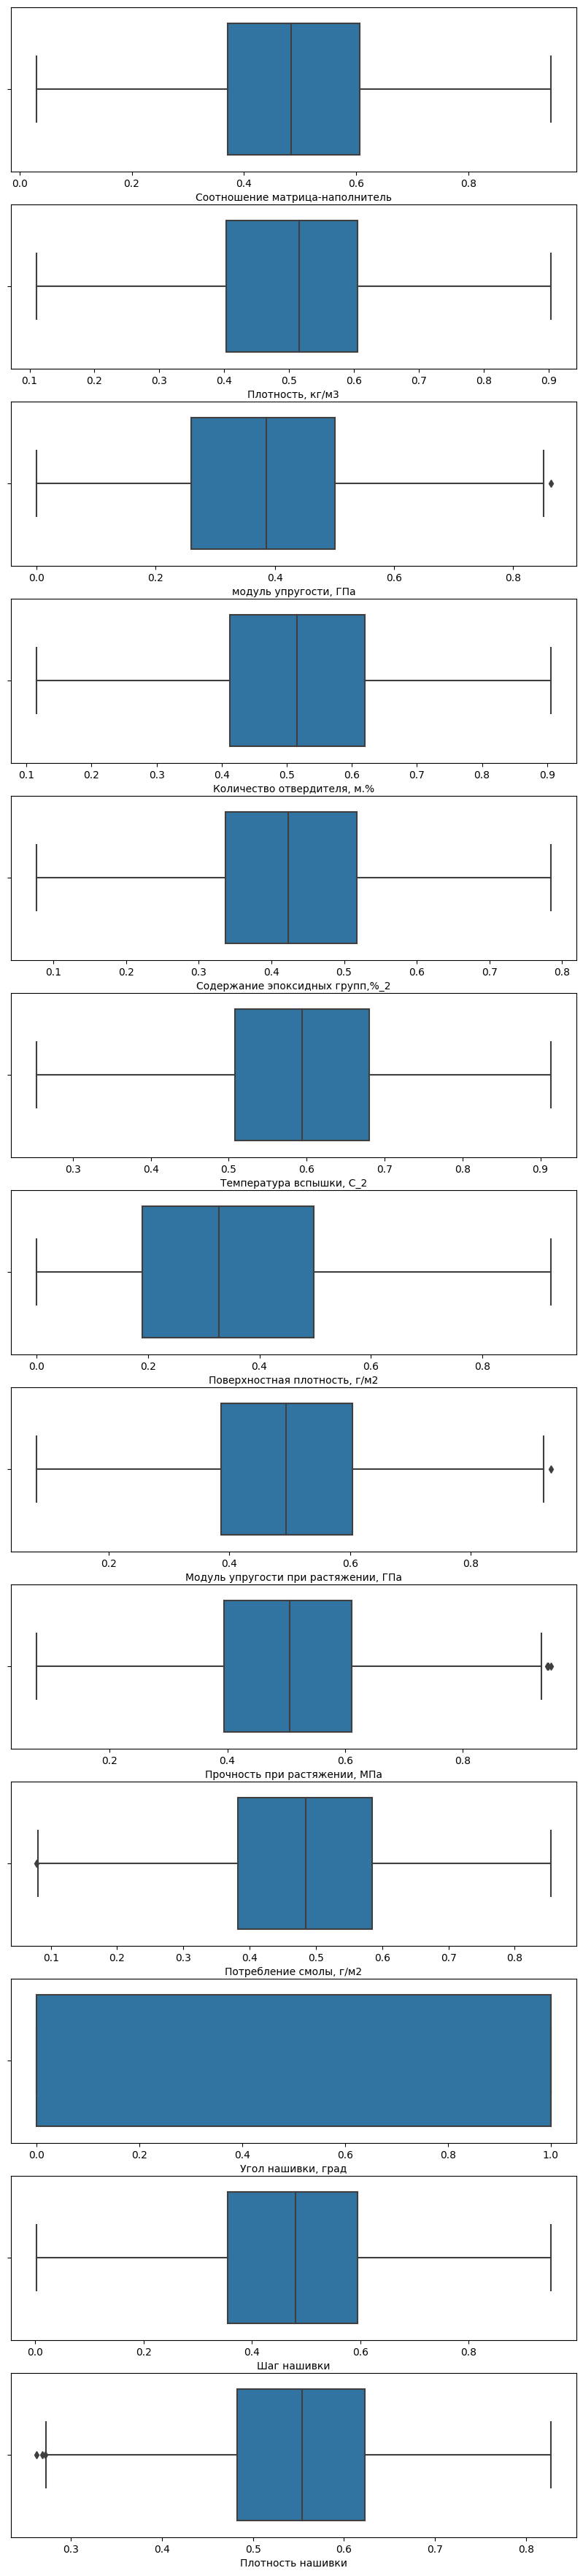

In [77]:
fig, axes = plt.subplots(13, 1, figsize=(10, 45))
for k, column in enumerate(df_norm.columns):    
    sns.boxplot(data=df_norm, x=column, ax=axes[k])
plt.show()

Видим, что выбросов стало существенно меньше, а для некоторых признаков их вообще не стало. Дальнейшую чистку от выбросов считаю нецелесообразной, т.к. датасет не большой и потеря еще части данных может негативно сказаться на обучении моделей.

Построение моделей предсказания модуля упругости при растяжении и прочности при растяжении

В качестве входных параметров будем брать все признаки, кроме двух целевых. Это множество будем использовать для предсказания обеих целевых признаков.
Целевых признака, как уже было сказано ранее, у нас два: модуль упругости при растяжении и прочность при растяжении.
Подготовим соответствующие переменные.

In [18]:
#Импортируем необходимые библиотеки
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import tree

In [19]:
df_norm

Соотношение матрица-наполнитель  Плотность, кг/м3  \
1                            0.282131          0.626533   
3                            0.282131          0.626533   
4                            0.457857          0.626533   
5                            0.457201          0.563509   
6                            0.419084          0.374437   
...                               ...               ...   
1018                         0.361750          0.462855   
1019                         0.587163          0.668737   
1020                         0.555750          0.505470   
1021                         0.637396          0.703842   
1022                         0.657131          0.333290   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
1                  0.385679                     0.178021   
3                  0.385679                     0.613972   
4                  0.393150                     0.519387   
5                  0.390531                     0.519387   
6                  0.421436                     0.519387   
...                     ...                          ...   
1018               0.476884                     0.382158   
1019               0.231678                     0.707685   
1020               0.217065                     0.512067   
1021               0.387114                     0.682389   
1022               0.217317                     0.614984   

      Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
1                            0.506535                  0.589311   
3                            0.373167                  0.638420   
4                            0.427467                  0.589311   
5                            0.427467                  0.589311   
6                            0.427467                  0.589311   
...                               ...                       ...   
1018                         0.313057                  0.717503   
1019                         0.285131                  0.492271   
1020                         0.517605                  0.473781   
1021                         0.266309                  0.561107   
1022                         0.705242                  0.641461   

      Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
1                          0.149682                              0.319194   
3                          0.149682                              0.319194   
4                          0.149682                              0.319194   
5                          0.149682                              0.319194   
6                          0.149682                              0.319194   
...                             ...                                   ...   
1018                       0.149109                              0.485125   
1019                       0.250230                              0.475992   
1020                       0.528643                              0.573346   
1021                       0.458108                              0.536217   
1022                       0.541942                              0.550550   

      Прочность при растяжении, МПа  Потребление смолы, г/м2  \
1                          0.698235                 0.488979   
3                          0.698235                 0.488979   
4                          0.698235                 0.488979   
5                          0.698235                 0.488979   
6                          0.698235                 0.488979   
...                             ...                      ...   
1018                       0.480312                 0.239516   
1019                       0.470745                 0.220404   
1020                       0.578340                 0.532590   
1021                       0.368070                 0.428909   
1022                       0.647135                 0.422680   

      Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                 

In [20]:
#Входные данные
x = df_norm.drop(['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа'], axis=1)
#Целевые признаки
y_upr = df_norm[['Модуль упругости при растяжении, ГПа']]
y_pr = df_norm[['Прочность при растяжении, МПа']]

In [21]:
#Делим данные на обучающую и тестовую выборку в соотношении 70% и 30% соответственно
X_train_upr, X_test_upr, y_train_upr, y_test_upr = train_test_split(x, y_upr, test_size=0.3, random_state=1)
X_train_pr, X_test_pr, y_train_pr, y_test_pr = train_test_split(x, y_pr, test_size=0.3, random_state=2)

Сначала займемся прогнозированием Модуля упругости при растяжении.

Будем использовать следующие модели:
    Линейная регрессия
    Линейная регрессия с полиномиальными параметрами
    Метод К-ближайших соседей
    Случайный лес
    Градиентный бустинг

Для сравнения моделей между собой будем считать коэффициент детерминации. Чем ближе его значение к 1, тем лучше модель.
Так же будем смотреть MSE, MAE и точность на основе MAE.

Про метрики:
Среднюю квадратичную ошибку (MSE) нельзя никак интерпретировать. Её можно только сравнить со среднеквадратичной ошибкой другой модели. Т.е. это только способ сравнить 2 модели между собой.
Средняя абсолютная ошибка (MAE) лучше в этом плане, по ней мы уже можем понять абсолютное значение, на которое модель ошибается. (Например, предсказывали цену и знаем на сколько рублей модель может ошибаться). Но для неё менее ощутимая разница между большой и маленькой ошибкой, а вот среднее квадратичная оценка сразу выявляет большие ошибки, т.к. мы возводим значения в квадрат. 

In [22]:
#Сделаем процедуру для распечатки метрик
def print_metrics(y_test_values, y_pred_values):
    MSE = metrics.mean_squared_error(y_test_values, y_pred_values).round(3)
    MAE = metrics.mean_absolute_error(y_test_values, y_pred_values)
    CoefDet = metrics.r2_score(y_test_values, y_pred_values).round(3)
    print('Средняя квадратичная ошибка MSE=', MSE)
    print('Средняя абсолютная ошибка MAE=', MAE.round(3))
    print('Коэффициент детерминации R2=', CoefDet)
    print('Точность модели (%)', ((1-MAE/np.mean(y_test_values.values))*100).round(3))

In [163]:
#Линейная регрессия
model = LinearRegression()
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.137
Коэффициент детерминации R2= -0.019
Точность модели (%) 72.31


MSE не очень большая, а вот MAE достаточно большая, с учетом того, что значения у нас нормализованы и находятся в диапазоне от 0 до 1.
Видно, что коэффициент детерминации близок к 0, прогноз близок в простому среднему.
Точность модели тоже оставляет желать лучшего.

In [133]:
#Полиномиальная регрессия
for degree in enumerate([2, 3, 4, 6]):
    X_test_pol = PolynomialFeatures(degree, include_bias=False).fit_transform(X_test_upr)
    X_train_pol = PolynomialFeatures(degree, include_bias=False).fit_transform(X_train_upr)
    model.fit(X_train_pol, y_train_upr)
    y_pred = model.predict(X_test_pol)
    print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.033
Средняя абсолютная ошибка MAE= 0.148
Коэффициент детерминации R2= -0.238
Точность модели (%) 69.944
Средняя квадратичная ошибка MSE= 0.089
Средняя абсолютная ошибка MAE= 0.227
Коэффициент детерминации R2= -2.314
Точность модели (%) 53.961
Средняя квадратичная ошибка MSE= 0.515
Средняя абсолютная ошибка MAE= 0.525
Коэффициент детерминации R2= -18.089
Точность модели (%) -6.374
Средняя квадратичная ошибка MSE= 0.471
Средняя абсолютная ошибка MAE= 0.496
Коэффициент детерминации R2= -16.479
Точность модели (%) -0.452


Полиномиальная регрессия дает еще более худшие результаты.
Видим, с увеличением степени многочлена, становится только хуже - ошибка растет, коэффициент детерминации удаляется от 1, точность падает.

In [162]:
#Метод К-ближайших соседей
#Попробовал различное значение параметра n_neighbors, от 5 до 200. С увеличением значения незначительно снижались MSE и MAE (после значения 50 стабилизировались),
#а R2 приближалась к 0 достаточно существенно (после значения 100 тоже стабилизировалась)
model = KNeighborsRegressor(n_neighbors=100)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.43


Метод К-ближайших соседей показали существенно лучший результат по коэффициенту детерминации, чем линейная регрессия. Остальные используемые метрики дали практически те же результаты. На сейчас это лучшая модель.

In [164]:
#Случайный лес
#Попробовал разные значения min_samples_split и max_features, оставил лучший вариант
#Ограничивать алгоритм глубиной или еще как-то не вижу смысла, т.к. датасет небольшой и вычислительных ресурсов хватает
model = RandomForestRegressor(min_samples_split=9, max_features='sqrt', random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.028
Средняя абсолютная ошибка MAE= 0.137
Коэффициент детерминации R2= -0.048
Точность модели (%) 72.242


Метод Случайный лес не дал хороших результатов.

In [211]:
#Градиентный бустинг
#Пробовал различные значения параметров n_estimators и learning_rate. При стандартном значении learning_rate=0.1 лучший результат при n_estimators=1
# (думаю, что получился какой-то вырожденный случай), далее попробовал вернуть стандартное n_estimators=100 иуменьшить скорость обучения.
# В итоге были получены неплохие результаты с указанными ниже параметрами.
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.0001, random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.559


In [191]:
#Дерево решений
#Т.к. Градиентный бустинг давал хороший результат при n_estimators=1, решил проверить простое Дерево решений с аналогичной глубиной,
#но результат слабый
model = tree.DecisionTreeRegressor(max_depth=3, random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.03
Средняя абсолютная ошибка MAE= 0.141
Коэффициент детерминации R2= -0.131
Точность модели (%) 71.404


In [15]:
#Попробуем использовать библиотеку lazypredict для выбора моделей для рассмотрения
from lazypredict.Supervised import LazyRegressor

In [114]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_upr, X_test_upr, y_train_upr, y_test_upr)
models

100%|██████████| 42/42 [00:19<00:00,  2.18it/s]


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DummyRegressor                              -0.04      -0.00  0.16        0.01
ElasticNet                                  -0.04      -0.00  0.16        0.03
LassoLars                                   -0.04      -0.00  0.16        0.04
Lasso                                       -0.04      -0.00  0.16        0.02
BayesianRidge                               -0.04      -0.00  0.16        0.06
QuantileRegressor                           -0.04      -0.00  0.16       13.52
PoissonRegressor                            -0.04      -0.00  0.16        0.02
TweedieRegressor                            -0.05      -0.00  0.16        0.02
GammaRegressor                              -0.05      -0.01  0.16        0.08
ElasticNetCV                                -0.05      -0.01  0.16        0.13
LassoCV                                     -0.05      -0.01  0.16        0.18
LarsCV                                      -0.05      -0.01  0.16        0.06
LassoLarsCV                                 -0.05      -0.01  0.16        0.05
OrthogonalMatchingPursuit                   -0.05      -0.01  0.16        0.01
LassoLarsIC                                 -0.05      -0.01  0.17        0.07
RidgeCV                                     -0.06      -0.02  0.17        0.05
Ridge                                       -0.06      -0.02  0.17        0.06
Lars                                        -0.06      -0.02  0.17        0.05
TransformedTargetRegressor                  -0.06      -0.02  0.17        0.02
LinearRegression                            -0.06      -0.02  0.17        0.03
OrthogonalMatchingPursuitCV                 -0.06      -0.02  0.17        0.03
SGDRegressor                                -0.07      -0.02  0.17        0.03
LinearSVR                                   -0.07      -0.03  0.17        0.03
HuberRegressor                              -0.07      -0.03  0.17        0.03
AdaBoostRegressor                           -0.08      -0.04  0.17        0.31
ExtraTreesRegressor                         -0.10      -0.06  0.17        0.43
RandomForestRegressor                       -0.14      -0.10  0.17        1.33
GradientBoostingRegressor                   -0.21      -0.16  0.18        0.47
BaggingRegressor                            -0.27      -0.22  0.18        0.15
HistGradientBoostingRegressor               -0.30      -0.25  0.18        0.54
LGBMRegressor                               -0.34      -0.29  0.19        0.12
KNeighborsRegressor                         -0.34      -0.29  0.19        0.05
SVR                                         -0.41      -0.35  0.19        0.09
XGBRegressor                                -0.43      -0.37  0.19        0.21
NuSVR                                       -0.48      -0.43  0.20        0.11
MLPRegressor                                -0.51      -0.45  0.20        0.29
PassiveAggressiveRegressor                  -0.56      -0.50  0.20        0.02
ExtraTreeRegressor                          -0.92      -0.85  0.22        0.02
DecisionTreeRegressor                       -1.33      -1.24  0.25        0.03
RANSACRegressor                             -1.73      -1.62  0.27        0.17
GaussianProcessRegressor                    -3.75      -3.56  0.35        0.14
KernelRidge                                 -9.49      -9.07  0.52        0.09

По результатам попробуем еще Lasso и ElasticNet - с неплохими результатами на общем фоне и малым затраченным временем.

In [16]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [231]:
#Лассо — это линейная модель, которая оценивает разреженные коэффициенты.
model = Lasso(alpha=0.1, random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.561


In [232]:
#Эластичная сеть — модель регрессии с двумя регуляризаторами
model = ElasticNet(alpha=0.1, random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.561


Действительно, обе модели дали неплохие результаты на фоне общего списка результатов. 
Однако ни одна модель так и не дала удовлетворительных результатов, т.к. коэффициент детерминации по всем моделям имеет отрицательное значение близкое к нулю.
На данном этапе лучший коэффициент детерминации -0,001 дали следующие модели:
    Метод К-ближайших соседей
    Градиентный бустинг
    Лассо
    Эластичная сеть
Попробуем поподбирать гиперпараметры для данных моделей более тщательно.
Для этого используем модуль GridSearchCV.

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
#Добавили процедуру для поиска и распечатки лучших гиперпараметров моделей
def Search_Model_Param(model_p, param_p, x_p, y_p):
    gs = GridSearchCV(model_p, param_p, cv = 10, verbose = 2, n_jobs =-1, scoring = 'r2')
    gs.fit(x_p, y_p)
    print(gs.best_params_)
    print(gs.best_estimator_)

In [25]:
#Напишем еще функции для отрисовки результатов прогнозирования - посмотрим для лучших моделей
#Функция построения графика оригинального и предсказанного значения у
def plot_act_pred(original_y, predicted_y):    
    plt.figure(figsize=(10,5))
    plt.title('Тестовые и прогнозируемые значения', size=12)
    plt.plot(range(len(original_y)), original_y, color='green', label = 'Тестовые значения')
    plt.plot(range(len(predicted_y)), predicted_y, color='red', label = 'Прогнозные значения')
    plt.legend(loc='best')
    plt.show()

#Функция построения точечного графика оригинального и предсказанного значения у   
def scatter_act_pred(original_y, predicted_y):
    plt.figure(figsize=(10,5))
    plt.title('Рассеяние тестовых и прогнозируемых значений', size=15)
    plt.scatter(original_y, predicted_y)
    plt.xlabel('Тестовые значения', size=12)
    plt.ylabel('Прогнозируемые значения', size=12)
    plt.show()
    
#Функция построения точечных графиков оригинального и предсказанного значения у от х по каждому столбцу
def scatter_by_col(original_X, original_y, predicted_y):
    for col in original_X.columns:
        plt.title('Синий - оригинальные значения, оранжевый - прогноз', size=12)
        plt.scatter(original_X[col], original_y, color='blue')
        plt.scatter(original_X[col], predicted_y, color='orange', marker='x')
        plt.xlabel(col, size=12)
        plt.ylabel(original_y.columns[0] , size=12)    
        plt.show()

In [26]:
#Подбор гиперпараметров - Метод К-ближайших соседей
#Попробуем перебрать значения параметра n_neighbors от 1 до 300 с шагом 5, а так же все доступные значения weights и algorithm
model = KNeighborsRegressor()
params = {'n_neighbors' : range(1, 300, 5), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
Search_Model_Param(model, params, X_train_upr, y_train_upr)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
{'algorithm': 'auto', 'n_neighbors': 106, 'weights': 'uniform'}
KNeighborsRegressor(n_neighbors=106)


In [28]:
#Подставим полученные параметры
model = KNeighborsRegressor(n_neighbors=106, weights='uniform', algorithm='auto')
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= 0.001
Точность модели (%) 72.424


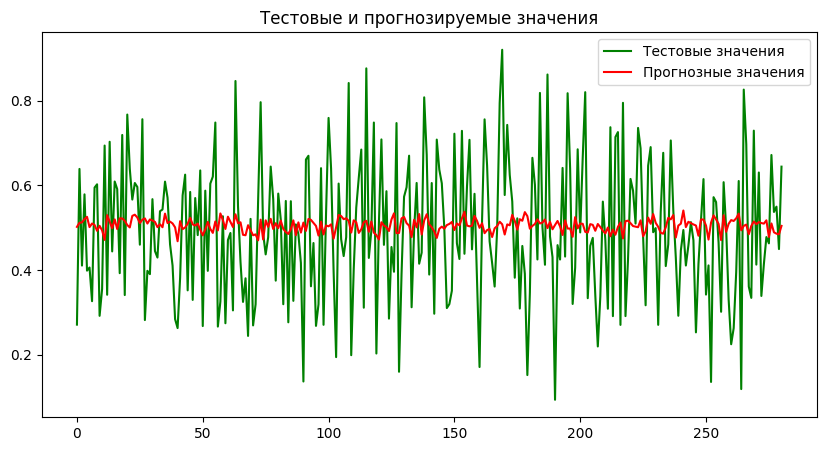

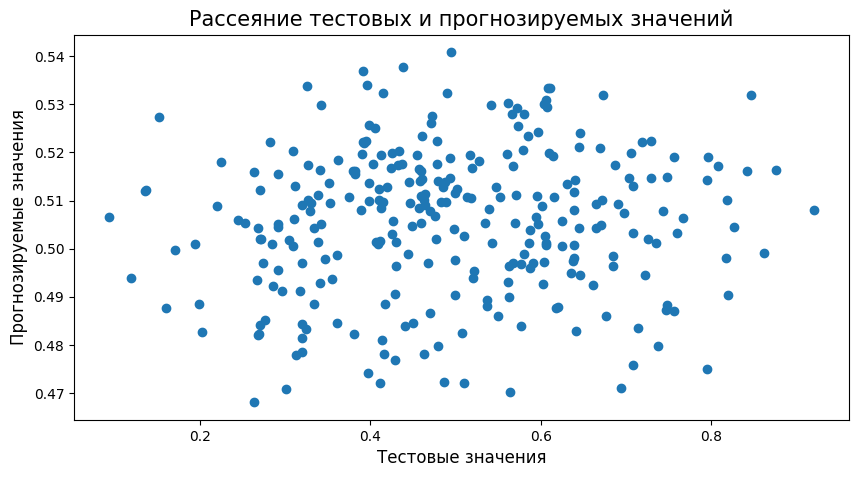

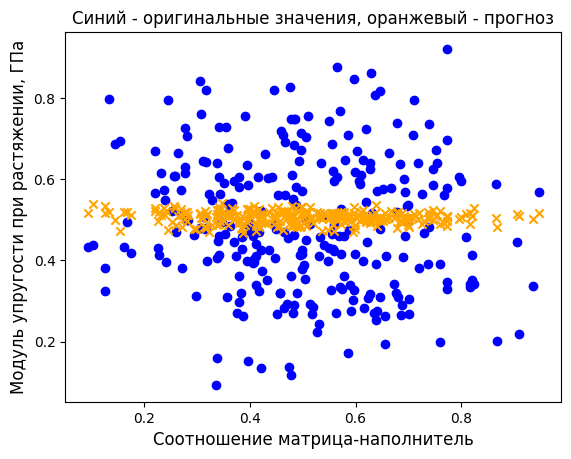

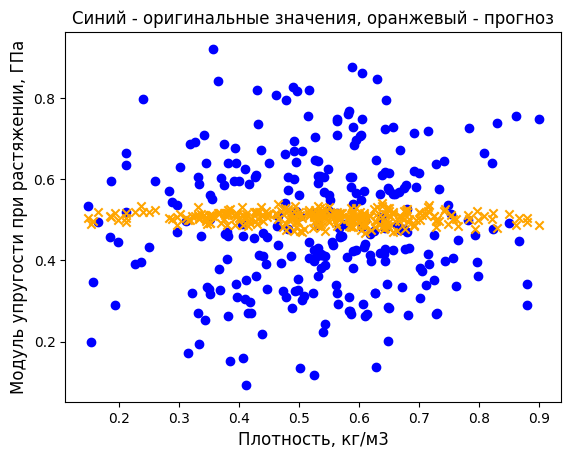

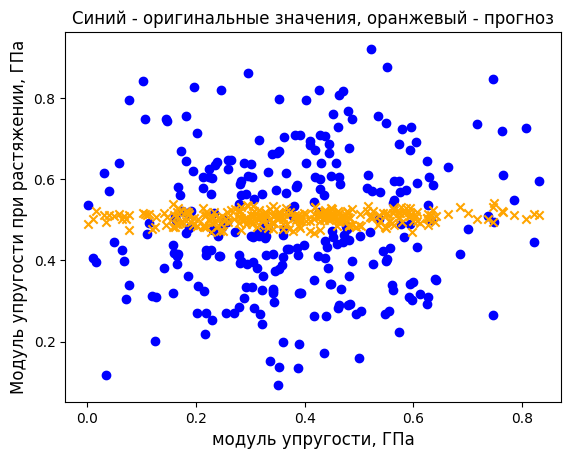

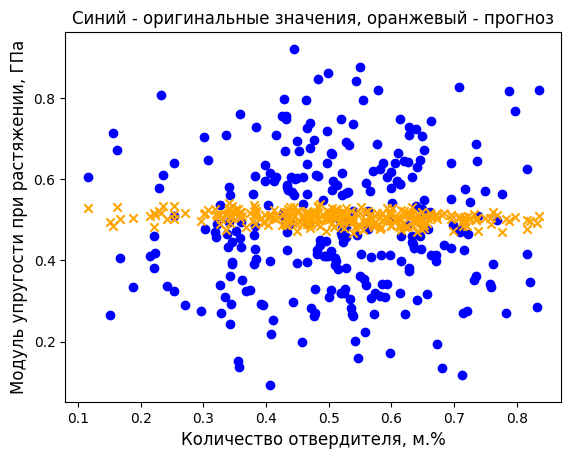

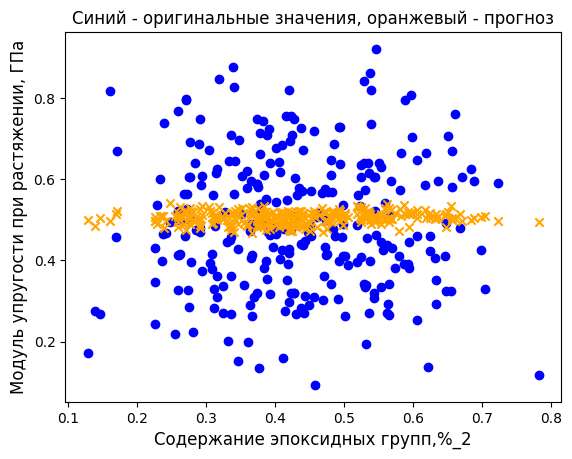

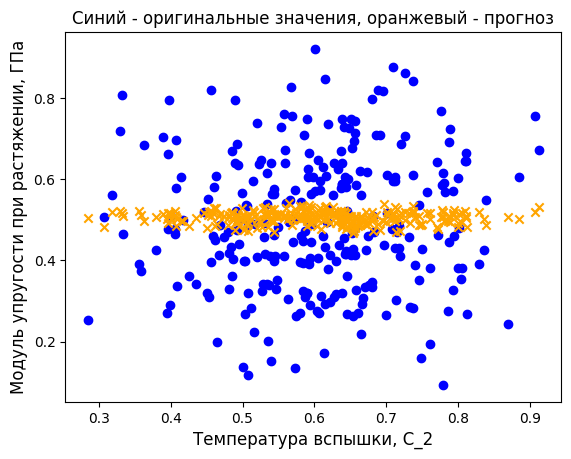

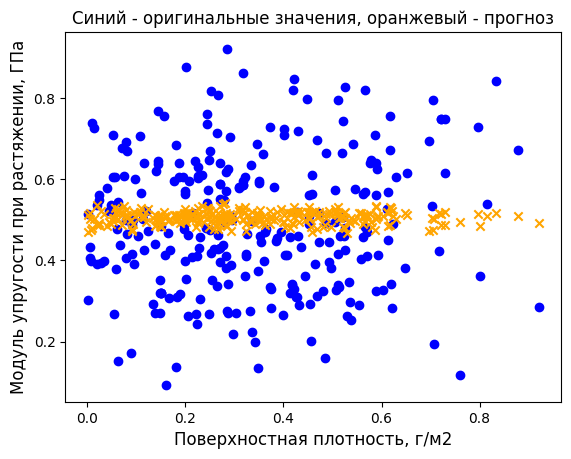

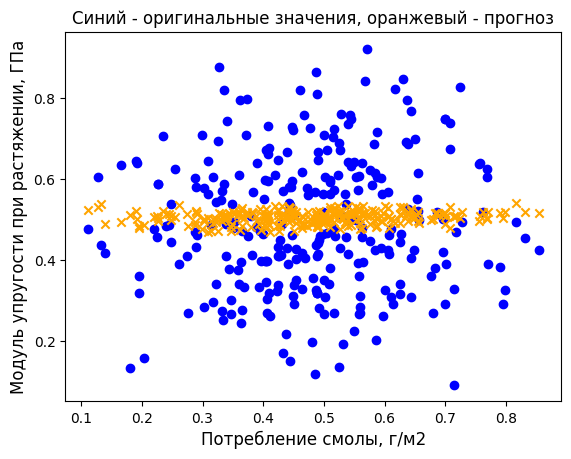

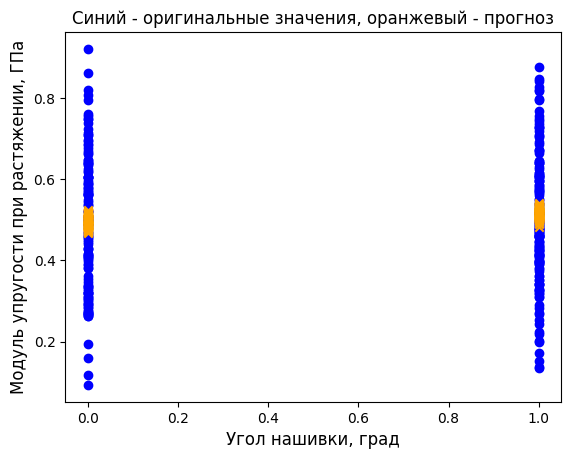

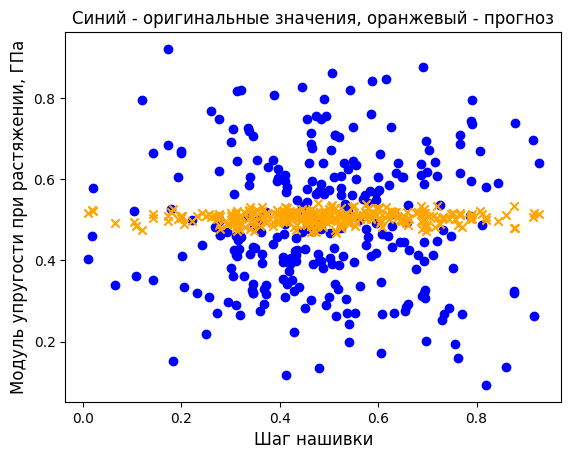

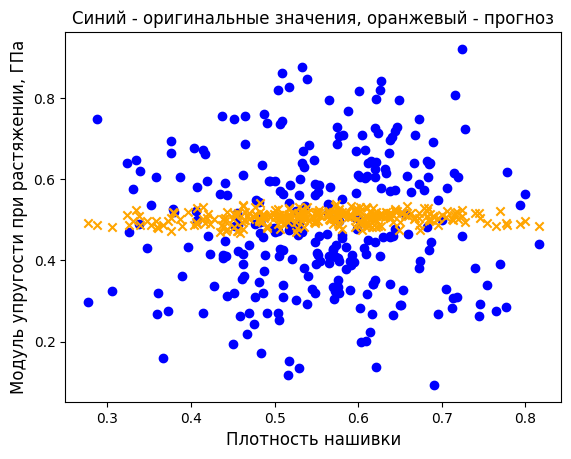

In [29]:
#Визуализируем полученные результаты
plot_act_pred(y_test_upr, y_pred)
scatter_act_pred(y_test_upr, y_pred)
scatter_by_col(X_test_upr, y_test_upr, y_pred)

Получили по крайней мере положительный коэффициент детерминации вместо -0.001 и те же значения метрик MSE и MAE.
Однако по графикам видно, что модель очень слабая и выдает целевые значения из средней части всего диапазона значений тестовой выборки.

In [228]:
#Подбор гиперпараметров - Градиентный бустинг

model = GradientBoostingRegressor(random_state=3)
params = {'n_estimators' : range(1, 200, 5), 
          'max_depth' : range(2, 5),
          'min_samples_split' :range(2, 5),
          'learning_rate' : np.arange(0.0001, 0.1, 0.001)
          }
Search_Model_Param(model, params, X_train_upr, y_train_upr)

Fitting 5 folds for each of 36000 candidates, totalling 180000 fits
{'learning_rate': 0.0911, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 11}
GradientBoostingRegressor(learning_rate=0.0911, n_estimators=11, random_state=3)


Задал слишком широкие условия поиска параметров, в итоге перебор занял более 7 часов.
В этом главная опасность использования автоматического поиска учших параметров - перебор может занять слишком много времени и потребовать слишком больших ресурсов.

In [229]:
#Подставим полученные параметры
model = GradientBoostingRegressor(learning_rate=0.0911, n_estimators=11, random_state=3, max_depth=3, min_samples_split=2)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.028
Средняя абсолютная ошибка MAE= 0.137
Коэффициент детерминации R2= -0.025
Точность модели (%) 72.239


In [33]:
#Странно, но результаты получились хуже, с подобранными вручную параметрами. Запустим еще раз подобранными ранее параметрами для сравнения
model = GradientBoostingRegressor(n_estimators=30, learning_rate=0.0001, random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.559


Да, не ошибался. В данном случае автоматический поиск параметрав не дал лучших результатов.

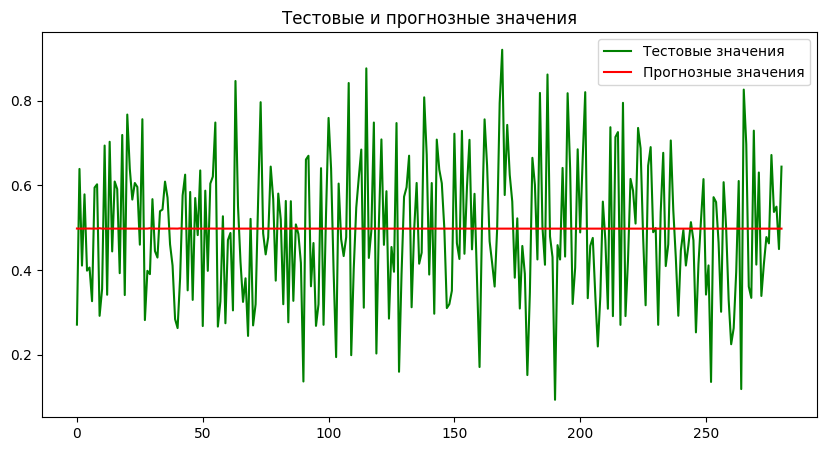

In [34]:
#Для моделей, дающих результат не лучше полученного ранее (пока лидер метод К-случайных соседей), будем смотрить только
#один график, чтобы не загромождать ноутбук
plot_act_pred(y_test_upr, y_pred)

Получаем просто прямую линию, т.к. коэффициент детерминации не больше 0.
Далее будем строить график только для моделей с положительным R2.

In [250]:
#Подбор гиперпараметров - Лассо
model = Lasso(random_state=3)
params = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.150, 0.2, 0.25, 0.5, 1], 
          'max_iter' : [100, 1000, 2000],
          'selection' : ['cyclic', 'random'],
          }
Search_Model_Param(model, params, X_train_upr, y_train_upr)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
{'alpha': 0.01, 'max_iter': 100, 'selection': 'cyclic'}
Lasso(alpha=0.01, max_iter=100, random_state=3)


In [251]:
#Подставим полученные параметры
model = Lasso(alpha=0.01, max_iter=100, selection='cyclic', random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= -0.001
Точность модели (%) 72.561


Получили такие же значения метрик, как с параметрами, подобранными вручную. 

In [253]:
#Подбор гиперпараметров - Эластичная сеть
model = ElasticNet(random_state=3)
params = {'alpha' : [0.001, 0.01, 0.05, 0.1, 0.150, 0.2, 0.25, 0.5, 1], 
          'max_iter' : [100, 1000, 2000],
          'l1_ratio' : [0.01, 0.05, 0.1, 0.25, 0.5, 1, 10],
          'selection' : ['cyclic', 'random'],
          }
Search_Model_Param(model, params, X_train_upr, y_train_upr)

Fitting 10 folds for each of 378 candidates, totalling 3780 fits
{'alpha': 0.01, 'l1_ratio': 0.05, 'max_iter': 100, 'selection': 'cyclic'}
ElasticNet(alpha=0.01, l1_ratio=0.05, max_iter=100, random_state=3)


In [254]:
#Подставим полученные параметры
model = ElasticNet(alpha=0.01, l1_ratio=0.05, max_iter=100, selection='cyclic', random_state=3)
model.fit(X_train_upr, y_train_upr)
y_pred = model.predict(X_test_upr)
print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.027
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.004
Точность модели (%) 72.48


Получили R2 чуть хуже, возможно неудачный диапазон поиска параметров, чтобы найти более удачный вариант.

Итак, при прогнозировании Модуля упругости при растяжении метод К-ближайших соседей показал лучшие результаты. 
Однако по всем опробованным моделям коэффициент детерминации имеет значения близкие к нулю, поэтому хорошо работающей модели не получено.

Теперь аналогичным образом будем прогнозировать Прочность при растяжении.

In [261]:
#Попробуем сразу использовать библиотеку lazypredict для выбора моделей для рассмотрения, однако полностью на неё полагаться не будем,
#т.к. на прогнозе Модуля упругости при растяжении она была не очень показательна.
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train_pr , X_test_pr, y_train_pr, y_test_pr)
models

100%|██████████| 42/42 [00:20<00:00,  2.05it/s]


Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
TweedieRegressor                            -0.04      -0.00  0.17        0.03
GammaRegressor                              -0.04      -0.00  0.17        0.12
PoissonRegressor                            -0.04      -0.00  0.17        0.02
BayesianRidge                               -0.04      -0.00  0.17        0.07
LassoLarsIC                                 -0.04      -0.00  0.17        0.05
LassoLarsCV                                 -0.05      -0.01  0.17        0.04
LassoCV                                     -0.05      -0.01  0.17        0.09
DummyRegressor                              -0.05      -0.01  0.17        0.02
ElasticNet                                  -0.05      -0.01  0.17        0.03
ElasticNetCV                                -0.05      -0.01  0.17        0.14
LarsCV                                      -0.05      -0.01  0.17        0.05
Lasso                                       -0.05      -0.01  0.17        0.01
LassoLars                                   -0.05      -0.01  0.17        0.01
OrthogonalMatchingPursuit                   -0.05      -0.01  0.17        0.02
RidgeCV                                     -0.05      -0.01  0.17        0.04
Ridge                                       -0.05      -0.01  0.17        0.02
Lars                                        -0.05      -0.01  0.17        0.04
LinearRegression                            -0.05      -0.01  0.17        0.02
TransformedTargetRegressor                  -0.05      -0.01  0.17        0.03
SGDRegressor                                -0.05      -0.01  0.17        0.05
QuantileRegressor                           -0.05      -0.01  0.17       13.99
OrthogonalMatchingPursuitCV                 -0.05      -0.01  0.17        0.03
LinearSVR                                   -0.06      -0.02  0.17        0.05
HuberRegressor                              -0.06      -0.02  0.17        0.05
AdaBoostRegressor                           -0.07      -0.03  0.17        0.36
RandomForestRegressor                       -0.09      -0.05  0.17        1.67
ExtraTreesRegressor                         -0.09      -0.05  0.17        0.44
GradientBoostingRegressor                   -0.19      -0.14  0.18        0.48
BaggingRegressor                            -0.21      -0.16  0.18        0.20
KNeighborsRegressor                         -0.21      -0.16  0.18        0.03
SVR                                         -0.21      -0.16  0.18        0.12
LGBMRegressor                               -0.21      -0.17  0.18        0.14
HistGradientBoostingRegressor               -0.22      -0.17  0.18        0.55
NuSVR                                       -0.31      -0.26  0.19        0.10
XGBRegressor                                -0.34      -0.29  0.19        0.44
MLPRegressor                                -0.41      -0.35  0.20        0.33
PassiveAggressiveRegressor                  -0.42      -0.36  0.20        0.03
RANSACRegressor                             -0.64      -0.57  0.21        0.20
DecisionTreeRegressor                       -1.02      -0.94  0.24        0.03
ExtraTreeRegressor                          -1.29      -1.20  0.25        0.03
GaussianProcessRegressor                    -3.82      -3.63  0.36        0.20
KernelRidge                                 -9.92      -9.49  0.55        0.07

Видим, что очевидно хороших моделей не выявлено, поэтому не будем сильно полагаться на результаты LazyRegressor.
Будем использовать следующие модели: 
    Линейная регрессия 
    Линейная регрессия с полиномиальными параметрами 
    Метод К-ближайших соседей 
    Градиентный бустинг
    TweedieRegressor - Обобщенная линейная модель с распределением Твиди.

Для сравнения моделей между собой так же будем считать коэффициент детерминации. Кроме того, будем смотреть MSE, MAE и точность на основе MAE.

In [262]:
#Линейная регрессия
model = LinearRegression()
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.008
Точность модели (%) 73.686


In [263]:
#Полиномиальная регрессия
for degree in enumerate([2, 3, 4]):
    X_test_pol = PolynomialFeatures(degree, include_bias=False).fit_transform(X_test_pr)
    X_train_pol = PolynomialFeatures(degree, include_bias=False).fit_transform(X_train_pr)
    model.fit(X_train_pol, y_train_upr)
    y_pred = model.predict(X_test_pol)
    print_metrics(y_test_upr, y_pred)

Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.137
Коэффициент детерминации R2= -0.062
Точность модели (%) 72.339
Средняя квадратичная ошибка MSE= 0.077
Средняя абсолютная ошибка MAE= 0.216
Коэффициент детерминации R2= -1.859
Точность модели (%) 56.299
Средняя квадратичная ошибка MSE= 0.751
Средняя абсолютная ошибка MAE= 0.552
Коэффициент детерминации R2= -26.868
Точность модели (%) -11.795


Простая линейная регрессия дала весьма скромные результаты.
Полиномиальная регрессия дает еще более худшие результаты. Видим, что с увеличением степени многочлена, становится только хуже - ошибка растет, коэффициент детерминации удаляется от 1, точность падает.

In [279]:
#Метод К-ближайших соседей
# Попробовал различное значение параметра n_neighbors, от 5 до 400. С увеличением значения незначительно снижались MSE и MAE (после значения 50 стабилизировались),
#а R2 приближалась к 0 достаточно существенно, но после n_neighbors=100 стала отдалять от 1 и уже уходить в минус.
model = KNeighborsRegressor(n_neighbors=100)
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.028
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= 0.002
Точность модели (%) 73.806


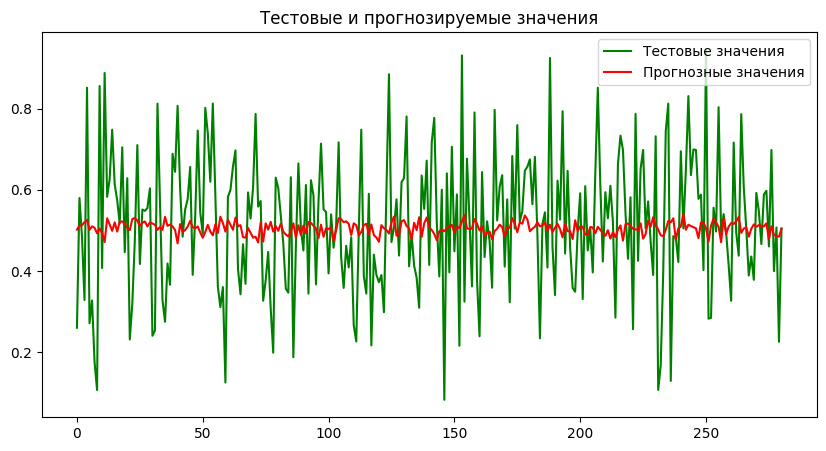

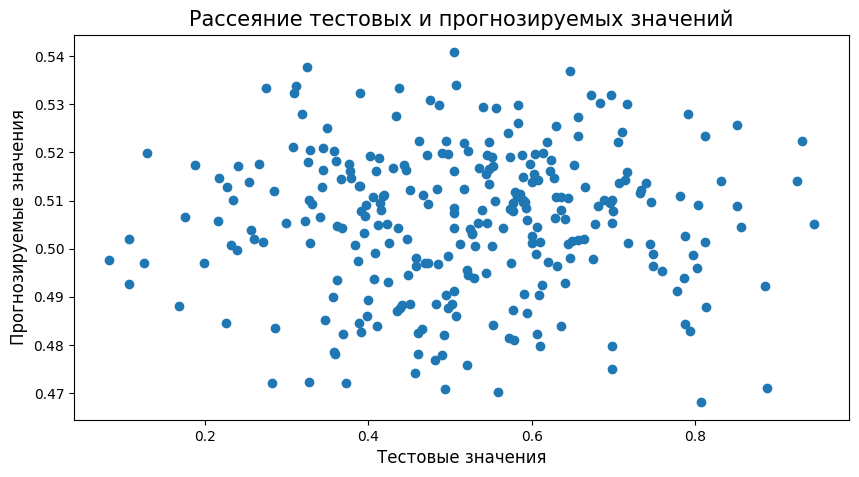

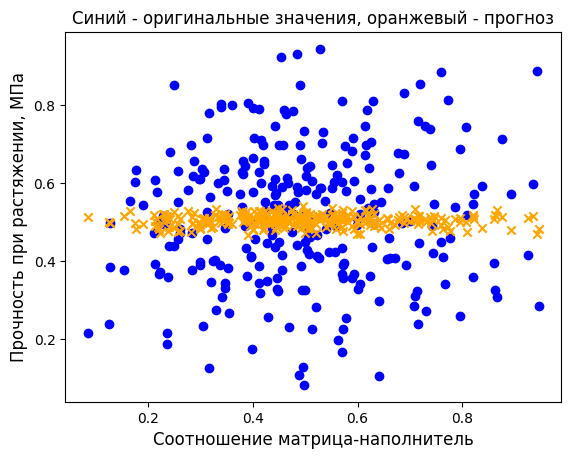

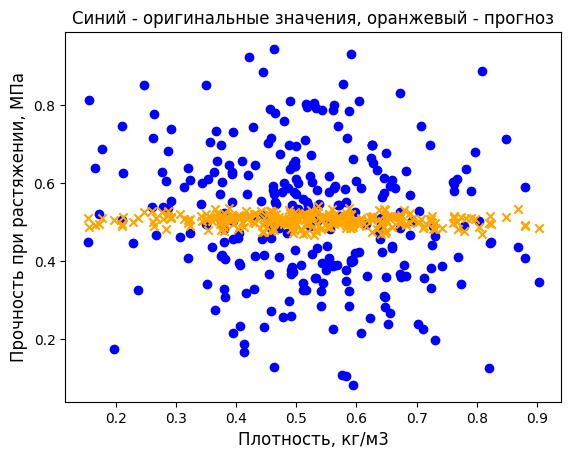

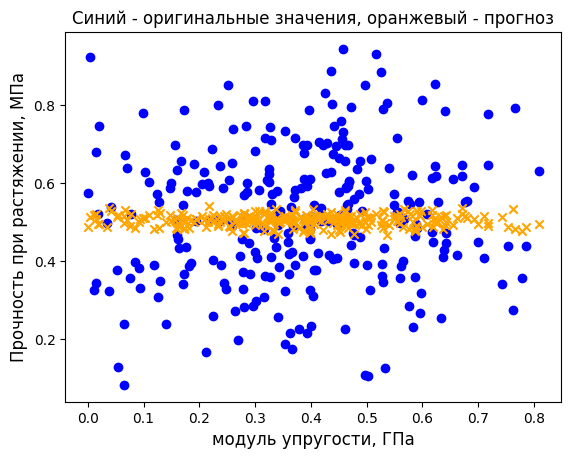

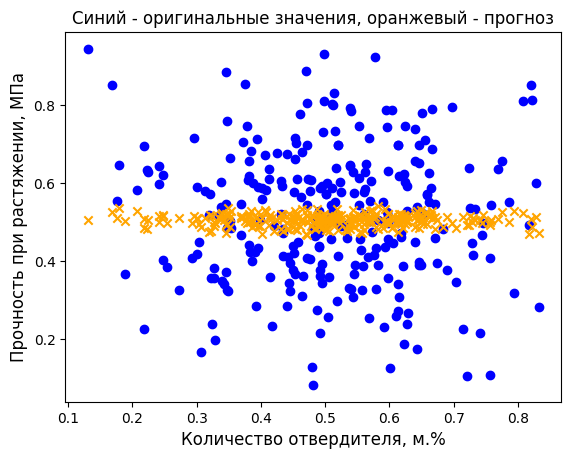

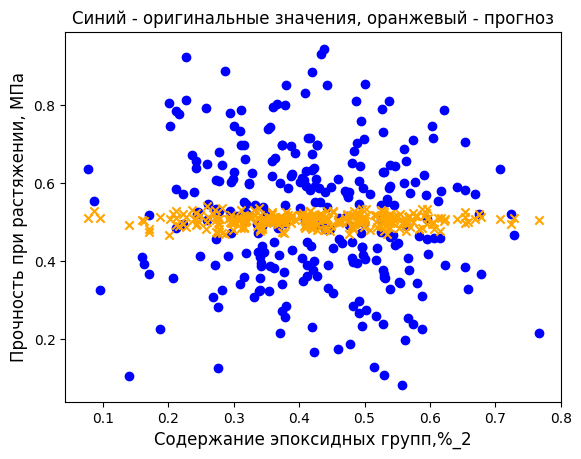

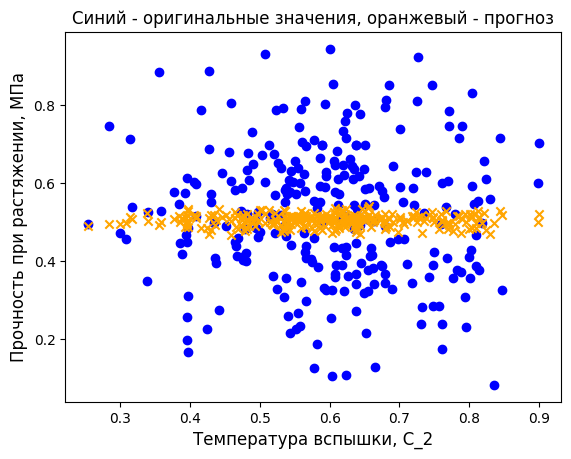

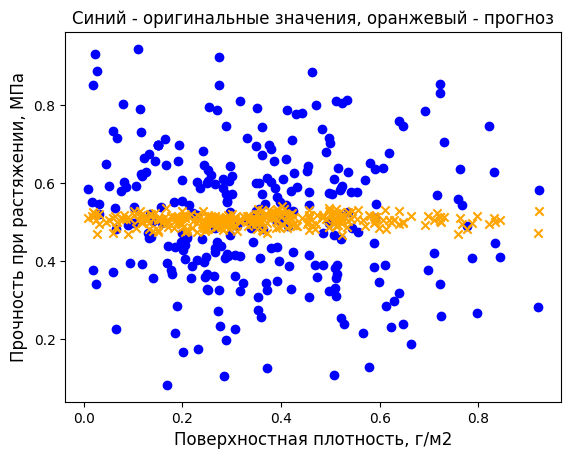

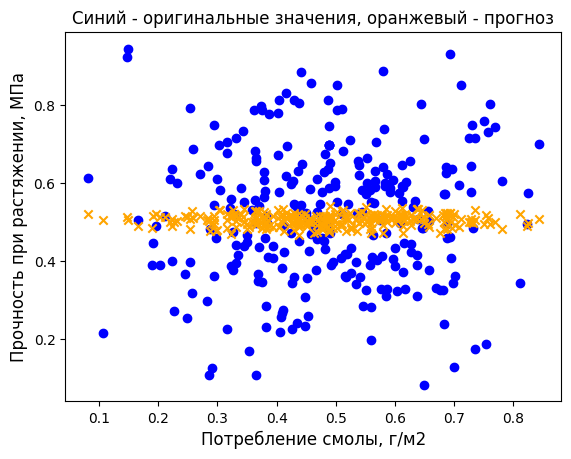

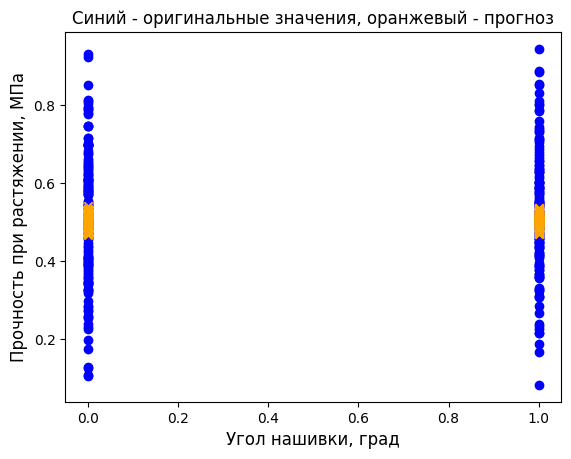

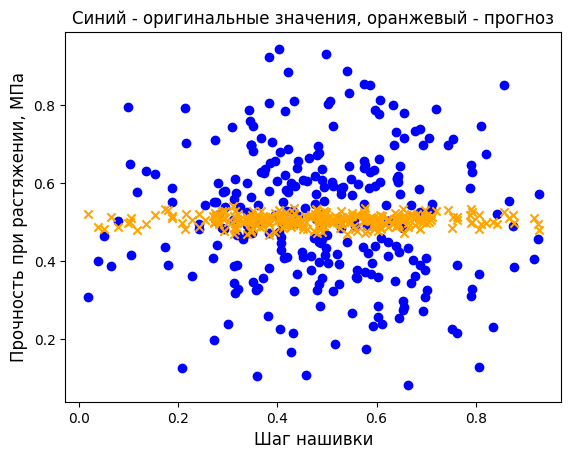

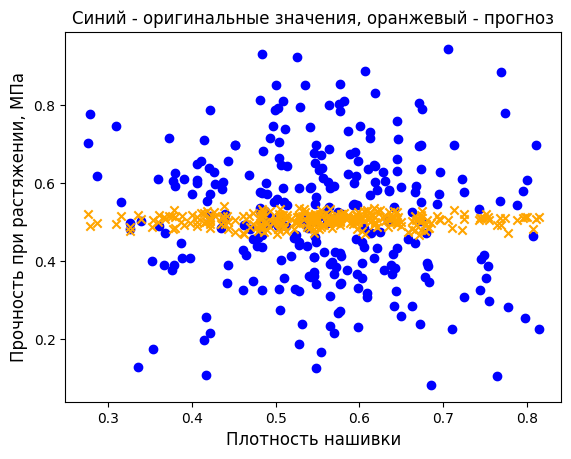

In [30]:
#Визуализируем полученные результаты
plot_act_pred(y_test_pr, y_pred)
scatter_act_pred(y_test_pr, y_pred)
scatter_by_col(X_test_pr, y_test_pr, y_pred)

Как и с прогнозированием Модуля упругости при растяжении метод К-ближайших соседей дает хороший результат на фоне остальных, коэффициент детерминации больше 0.

In [299]:
#Градиентный бустинг
#Пробовал различные значения параметров n_estimators и learning_rate. Не нашёл особой закономерности. пока оставим лучшие параметры из перебранных.
model = GradientBoostingRegressor(n_estimators=3, learning_rate=0.01, random_state=3)
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.73


TweedieRegressor - Обобщенная линейная модель с распределением Твиди.
Сразу попробуем перебрать значения параметра power, который определяет базовое целевое распределение:
0       Normal 
1       Poisson
(1,2)   Compound Poisson Gamma
2       Gamma
3       Inverse Gaussian

In [302]:
from sklearn.linear_model import TweedieRegressor
for power_val in [0,1,1.5,2,3]:
    model = TweedieRegressor(power=power_val)
    model.fit(X_train_pr, y_train_pr)
    y_pred = model.predict(X_test_pr)
    if power_val == 0:
        print('Normal distribution ')
    if power_val == 1:
        print('Poisson distribution ')
    if power_val == 1.5:
        print('Compound Poisson Gamma distribution ')
    if power_val == 2:
        print('Gamma distribution ')
    if power_val == 3:
        print('Inverse Gaussian distribution ')                                
    print_metrics(y_test_pr, y_pred)

Normal distribution 
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.735
Poisson distribution 
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.732
Compound Poisson Gamma distribution 
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.734
Gamma distribution 
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.005
Точность модели (%) 73.735
Inverse Gaussian distribution 
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.005
Точность модели (%) 73.74


В целом результат неплохой, практически одинаковые значения метрик для всех вариантов распределения.
Возможно стоит подобрать другие гиперпараметры.

Отберем лучшие модели и попробуем поподбирать гиперпараметры для данных более тщательно. Для этого используем модуль GridSearchCV.
    Метод К-ближайших соседей
    Градиентный бустинг
    Обобщенная линейная модель 

In [307]:
#Подбор гиперпараметров - Метод К-ближайших соседей
#Попробуем перебрать значения параметра n_neighbors от 1 до 300 с шагом 5, а так же все доступные значения weights и algorithm
model = KNeighborsRegressor()
params = {'n_neighbors' : range(5, 150, 5), 
          'weights' : ['uniform', 'distance'],
          'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
Search_Model_Param(model, params, X_train_pr, y_train_pr)

Fitting 10 folds for each of 232 candidates, totalling 2320 fits
{'algorithm': 'auto', 'n_neighbors': 145, 'weights': 'uniform'}
KNeighborsRegressor(n_neighbors=145)


In [35]:
#Подставим полученные параметры
model = KNeighborsRegressor(n_neighbors=145, weights='uniform', algorithm='auto')
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.028
Средняя абсолютная ошибка MAE= 0.135
Коэффициент детерминации R2= 0.006
Точность модели (%) 73.86


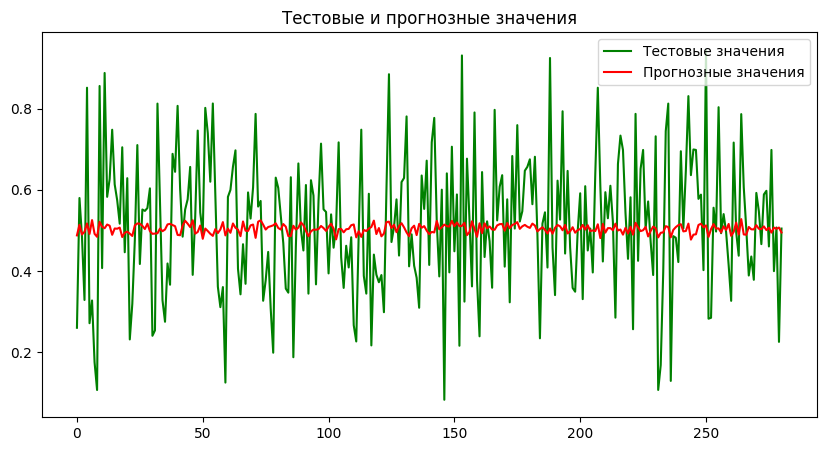

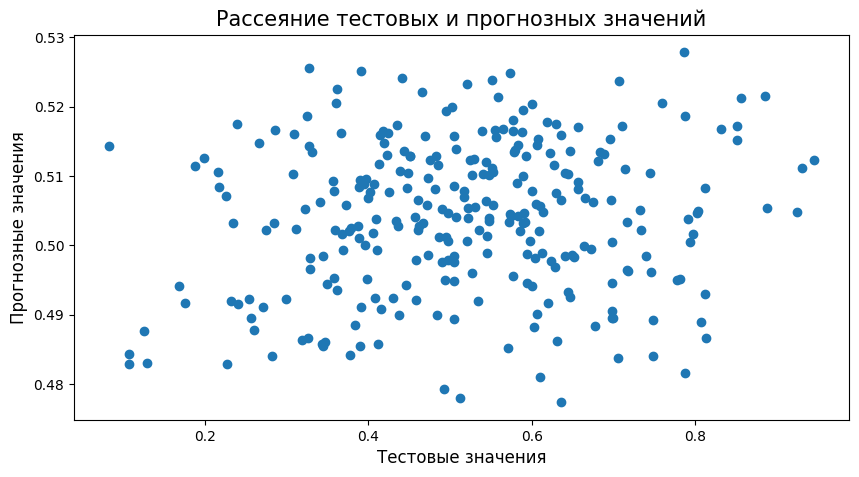

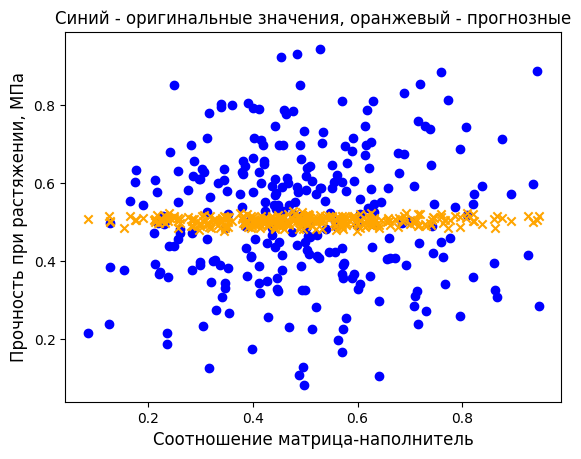

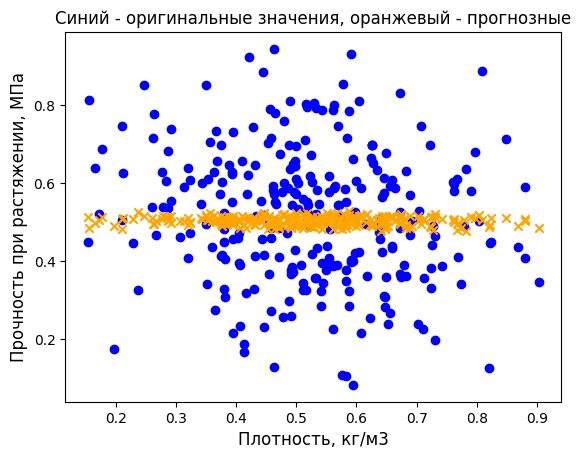

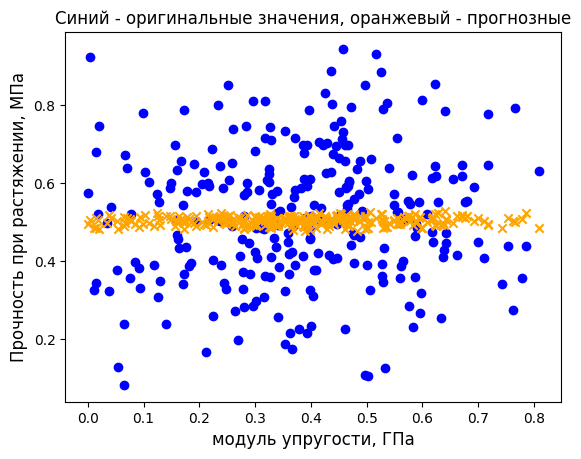

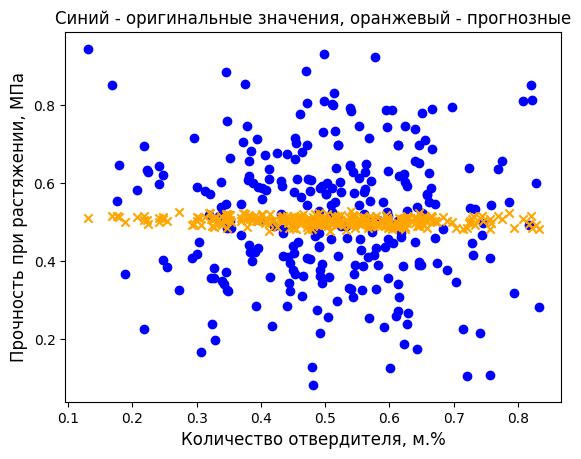

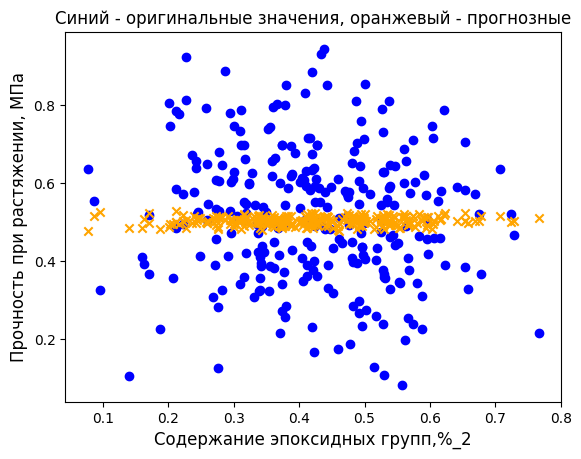

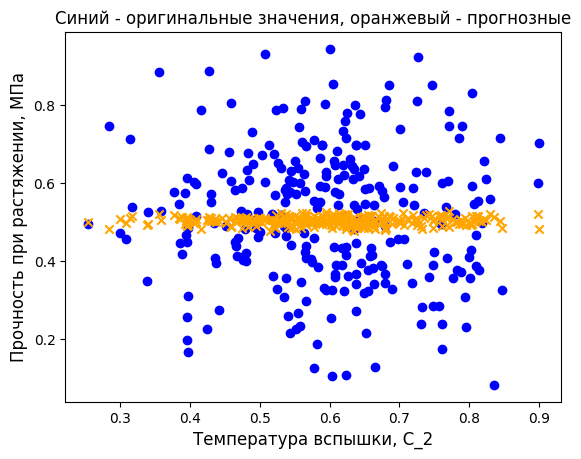

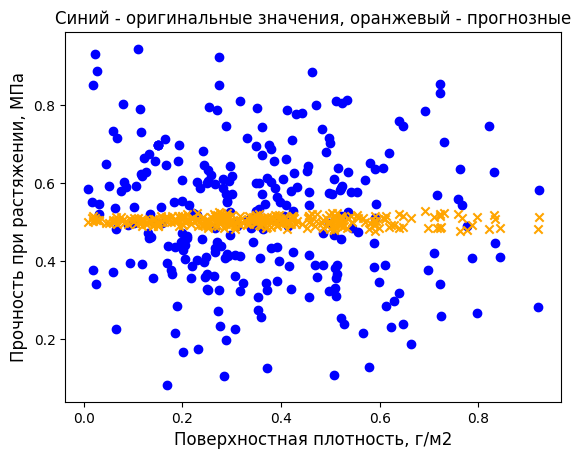

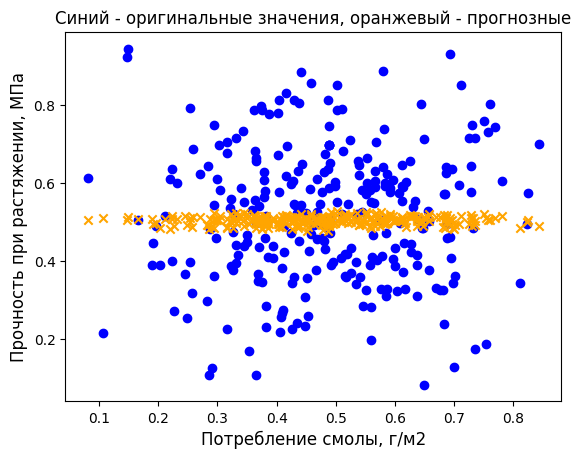

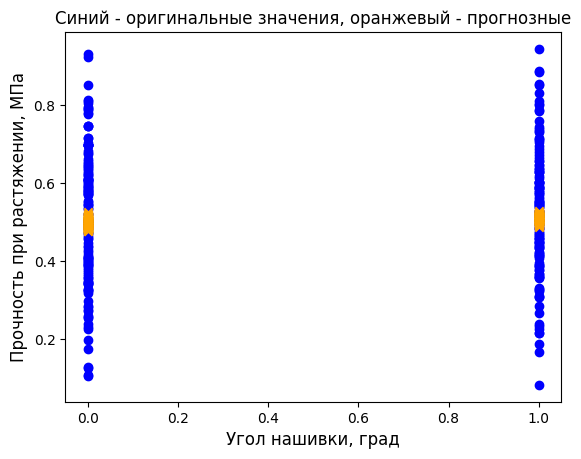

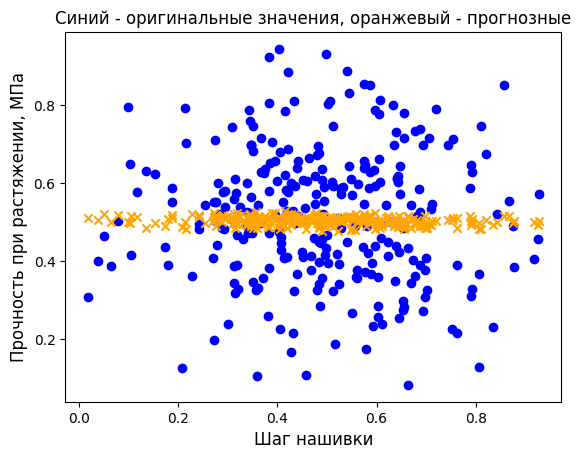

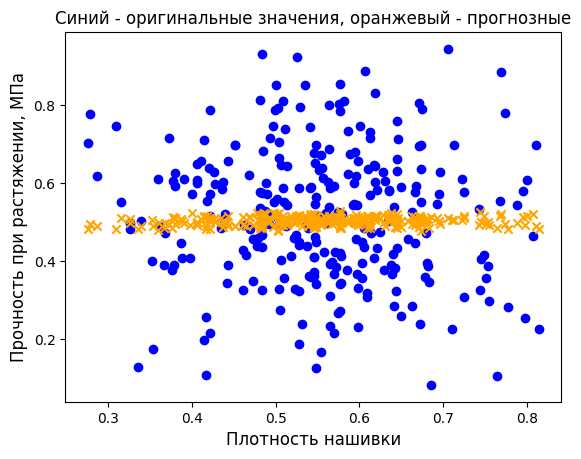

In [36]:
#Визуализируем полученные результаты
plot_act_pred(y_test_pr, y_pred)
scatter_act_pred(y_test_pr, y_pred)
scatter_by_col(X_test_pr, y_test_pr, y_pred)

Т.к. коэффициент детерминации все-таки очень близок к 0, то и на графиках видим, что все наши предсказанные значения лежат недалеко от среднего значения.

In [309]:
#Подбор гиперпараметров - Градиентный бустинг
model = GradientBoostingRegressor(random_state=3)
params = {'n_estimators' : range(1, 200, 5), 
          'max_depth' : range(2, 5),
          'min_samples_split' :range(2, 5),
          'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1]
          }
Search_Model_Param(model, params, X_train_pr, y_train_pr)

Fitting 10 folds for each of 1800 candidates, totalling 18000 fits
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 1}
GradientBoostingRegressor(max_depth=4, n_estimators=1, random_state=3)


In [310]:
#Подставим полученные параметры
model = GradientBoostingRegressor(max_depth=4, n_estimators=1, random_state=3)
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.008
Точность модели (%) 73.715


Странно, но результаты получились опять немного хуже, чем с подобранными вручную параметрами. 
Ранее при запуске с параметрами GradientBoostingRegressor (learning_rate=0.01, n_estimators=3) были получены следующие результаты:
Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.73

In [312]:
#Обобщенная линейная модель с распределением Твиди - Градиентный бустинг
model = TweedieRegressor(verbose=1)
params = {'power' : [0,1,1.3,1.5,1.7,2,3], 
          'alpha' : [0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1, 10, 100],
          'solver' : ['lbfgs', 'newton-cholesky'],
          'max_iter' : [10, 100, 200, 500]
          }
Search_Model_Param(model, params, X_train_pr, y_train_pr)

Fitting 10 folds for each of 504 candidates, totalling 5040 fits
{'alpha': 100, 'max_iter': 10, 'power': 1, 'solver': 'lbfgs'}
TweedieRegressor(alpha=100, max_iter=10, power=1, verbose=1)


In [313]:
#Подставим полученные параметры
model = TweedieRegressor(alpha=100, max_iter=10, power=1, verbose=1)
model.fit(X_train_pr, y_train_pr)
y_pred = model.predict(X_test_pr)
print_metrics(y_test_pr, y_pred)

Средняя квадратичная ошибка MSE= 0.029
Средняя абсолютная ошибка MAE= 0.136
Коэффициент детерминации R2= -0.006
Точность модели (%) 73.729


Итак, при прогнозировании Прочночти при растяжении метод К-ближайших соседей показал лучшие результаты. Однако по всем опробованным моделям коэффициент детерминации имеет значения близкие к нулю, поэтому хорошо работающей модели не получено.

Перейдем к прогнозированию Соотношения матрица-наполнитель с помощью нейронной сети.

Воспользуемся уже подготовленными нормализованными данными.

In [101]:
#Импортируем необходимые библиотеки
#import tensorflow.keras as keras
import keras as keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense, Input, Dropout
#from tensorflow.keras.optimizers import SGD
from keras.optimizers import SGD

In [89]:
#Воспользуемся уже подготовленными нормализованными данными.
#Входные данные
X = df_norm.drop(['Соотношение матрица-наполнитель'], axis=1)
#Целевые признаки
y = df_norm[['Соотношение матрица-наполнитель']]
#Делим данные на обучающую и тестовую выборку в соотношении 70% и 30% соответственно
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [33]:
X_train.shape

(655, 12)

In [35]:
#Попробуем нейронную сеть
def base_model():
    model = Sequential()
    #model.add(Input(shape=12)) #входной слой - с ним явно хуже работает
    model.add(Dense(8, input_dim=12, activation='tanh')) # скрытый полносвязный слой 1 
    model.add(Dense(8, activation='tanh')) # скрытый полносвязный слой 2
    model.add(Dense(1, activation='linear')) # выходной слой
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer='sgd')
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [36]:
batch_size = 128 # на каждой итерации обучения мы обрабатываем 128 примеров обучающей выборки
num_epochs = 400 # мы делаем 400 проходов обучения по обучающей выборке
valid_split = 0.1 # 10% выборки для валидации

In [37]:
#Создаем НС и обучаем её
model = base_model()
history = model.fit(X_train, y_train, 
                    batch_size=batch_size, epochs=num_epochs,
                    verbose=1, validation_split=valid_split) 

Epoch 1/400
5/5 [==============================] - 1s 70ms/step - loss: 0.1828 - val_loss: 0.1201
Epoch 2/400
5/5 [==============================] - 0s 17ms/step - loss: 0.0665 - val_loss: 0.0728
Epoch 3/400
5/5 [==============================] - 0s 20ms/step - loss: 0.0477 - val_loss: 0.0622
Epoch 4/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0446 - val_loss: 0.0588
Epoch 5/400
5/5 [==============================] - 0s 15ms/step - loss: 0.0437 - val_loss: 0.0574
Epoch 6/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0434 - val_loss: 0.0570
Epoch 7/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0430 - val_loss: 0.0562
Epoch 8/400
5/5 [==============================] - 0s 19ms/step - loss: 0.0428 - val_loss: 0.0560
Epoch 9/400
5/5 [==============================] - 0s 14ms/step - loss: 0.0425 - val_loss: 0.0551
Epoch 10/400
5/5 [==============================] - 0s 16ms/step - loss: 0.0423 - val_loss: 0.0549
Epoch 11/400
5/5 [=

In [40]:
#Предсказываем значения
y_pred = model.predict(X_test)

9/9 [==============================] - 0s 1ms/step


Средняя квадратичная ошибка MSE= 0.031
Средняя абсолютная ошибка MAE= 0.144
Коэффициент детерминации R2= -0.022
Точность модели (%) 71.264


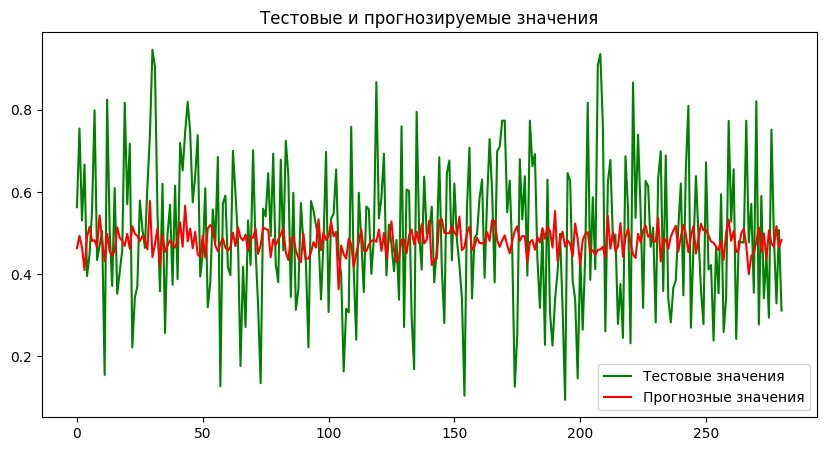

In [42]:
#Печатаем метрики и график
print_metrics(y_test, y_pred)
plot_act_pred(y_test, y_pred)

Видим, что модель работает слабо, коэффициент корреляции отрицательный. По графику так же видно, что предсказания находятся в небольшом диапазоне от среднего значения.
Так же видно, что на 370й эпохе можно было остановиться, т.к. ошибка перестала уменьшаться.

In [48]:
model.summary() #архитектура модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


9/9 [==============================] - 0s 2ms/step
Средняя квадратичная ошибка MSE= 0.03
Средняя абсолютная ошибка MAE= 0.143
Коэффициент детерминации R2= -0.003
Точность модели (%) 71.456


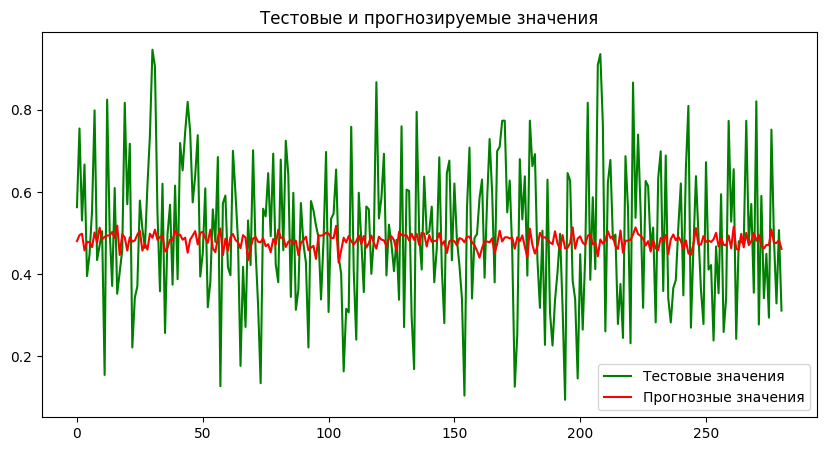

In [102]:
#Вариант 2
#Пробуем изменить архитектуру
def base_model():
    model = Sequential()
    #model.add(Input(shape=12))
    model.add(Dense(8, input_dim=12, activation='tanh')) # скрытый полносвязный слой 1 
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='tanh')) # скрытый полносвязный слой 2
    model.add(Dense(1, activation='linear')) # выходной слой
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer='sgd')
    #model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

#Создаем НС и обучаем её
model = base_model()
history = model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.1) 

#Предсказываем значения
y_pred = model.predict(X_test)

#Печатаем метрики и график
print_metrics(y_test, y_pred)
plot_act_pred(y_test, y_pred)

Добавили Dropout слой. Модель стала немного лучше, это видно по метрике R2 и точности, хотя по графику этого не скажешь.

Epoch 1/140
19/19 [==============================] - 1s 39ms/step - loss: 0.3047 - val_loss: 0.0553
Epoch 2/140
19/19 [==============================] - 0s 10ms/step - loss: 0.1114 - val_loss: 0.0549
Epoch 3/140
19/19 [==============================] - 0s 9ms/step - loss: 0.0788 - val_loss: 0.0526
Epoch 4/140
19/19 [==============================] - 0s 9ms/step - loss: 0.0769 - val_loss: 0.0503
Epoch 5/140
19/19 [==============================] - 0s 8ms/step - loss: 0.0707 - val_loss: 0.0451
Epoch 6/140
19/19 [==============================] - 0s 9ms/step - loss: 0.0714 - val_loss: 0.0510
Epoch 7/140
19/19 [==============================] - 0s 10ms/step - loss: 0.0639 - val_loss: 0.0449
Epoch 8/140
19/19 [==============================] - 0s 9ms/step - loss: 0.0674 - val_loss: 0.0457
Epoch 9/140
19/19 [==============================] - 0s 10ms/step - loss: 0.0649 - val_loss: 0.0469
Epoch 10/140
19/19 [==============================] - 0s 11ms/step - loss: 0.0538 - val_loss: 0.0457
Epoc

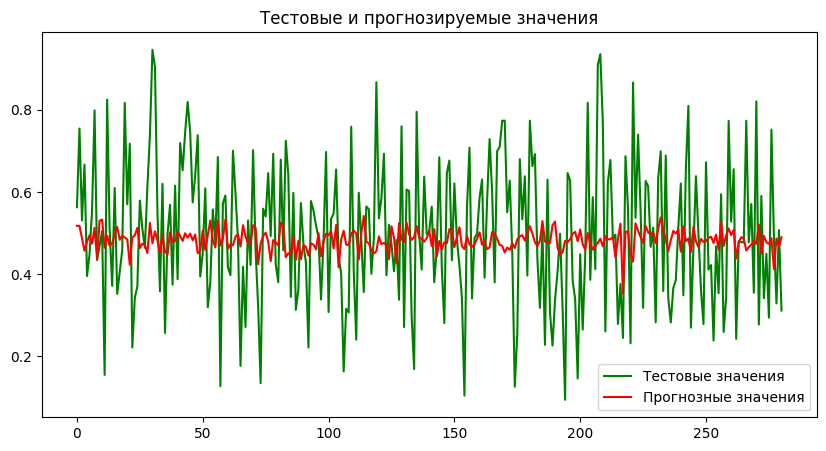

In [119]:
#Вариант 3
def base_model():
    model = Sequential()
    #model.add(Input(shape=12))
    model.add(Dense(8, input_dim=12, activation='tanh')) # скрытый полносвязный слой 1 input_dim=12
    model.add(Dense(8, activation='tanh')) # скрытый полносвязный слой 2
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='linear')) # выходной слой
    #sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer='sgd')
    #model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 
    return model

#Создаем НС и обучаем её
model = base_model()
history = model.fit(X_train, y_train, 
                    #batch_size=128, 
                    epochs=140,
                    verbose=1, validation_split=0.1) 

#Предсказываем значения
y_pred = model.predict(X_test)

#Печатаем метрики и график
print_metrics(y_test, y_pred)
plot_act_pred(y_test, y_pred)